<h1 style="color:red;font-size:46px;text-align:center;">Klinikbewertungen.de<h1/>

<h1 align=center><font size = 6, color = blue>Exploratory Data Analysis-2</font></h1>

In [23]:
import pandas as pd
import numpy as np

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [25]:
df = pd.read_csv("klinik_bewertungen_afterAnalysis.csv")
df.head()

,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive
0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.0,2021,6,7,100.0,100.0,100.0,100.0,100.0,1
1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.0,2021,5,25,100.0,100.0,100.0,100.0,67.0,1
2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.0,2021,5,11,100.0,100.0,100.0,100.0,100.0,1
3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.0,2021,5,9,100.0,100.0,100.0,67.0,100.0,1
4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.0,2021,5,7,100.0,100.0,100.0,100.0,67.0,1


In [26]:
df[["Name der Klinik","Fachbereich","Erfahrungsbericht"]].describe(include=['object'])

,Name der Klinik,Fachbereich,Erfahrungsbericht
count,2058,2058,2058
unique,17,35,2058
top,DIAKOVERE Henriettenstift,Orthopädie,"Ich bin grad erschrocken, was ich über die Kli..."
freq,241,269,1


<h2 id="basic_grouping">Grouping by Klinik</h2>

In [27]:
df_kliniks_mean=df.groupby(['Name der Klinik'],as_index=False).mean()
df_kliniks_mean=df_kliniks_mean[['Name der Klinik','Polaritiy','Gesamt','positive']]
df_kliniks_mean

,Name der Klinik,Polaritiy,Gesamt,positive
0,AMEOS Klinikum Hildesheim,0.070400,34.319767,0.622093
1,AMEOS Klinikum Seepark Geestland,0.274780,70.861111,0.854167
2,DIAKOVERE Henriettenstift,0.235991,60.165975,0.742739
3,Eilenriede Klinik Hannover,0.449850,84.367347,0.897959
4,HELIOS Klinik Cuxhaven,0.261306,56.910569,0.747967
5,Helios Kliniken Mittelweser,0.256709,54.572581,0.814516
6,Herzogin Elisabeth Hospital,0.371762,79.179688,0.875000
7,KRH Klinikum Agness Karll Laatzen,0.184622,48.610169,0.694915
8,Klinik am Zuckerberg,0.472796,91.350649,0.922078
9,Klinikum Peine,0.275747,62.317241,0.751724


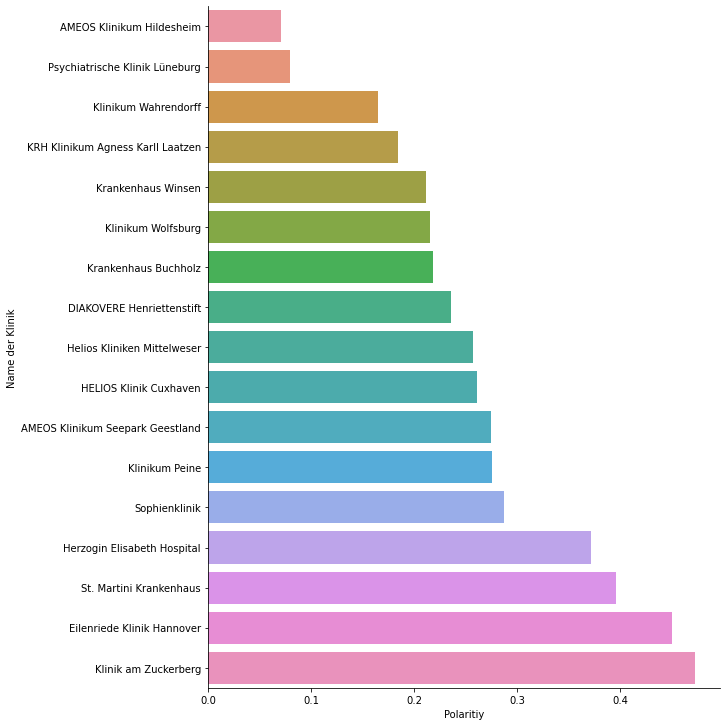

In [28]:
df_kliniks_mean=df_kliniks_mean.sort_values('Polaritiy')
sns.catplot(x="Polaritiy",y="Name der Klinik",data=df_kliniks_mean,kind="bar",height=10)
#g.fig.savefig("Images/KlinikPolarities.png")

In [109]:
df_kliniks_mean

,Name der Klinik,Polaritiy,Gesamt,positive
14,Psychiatrische Klinik Lüneburg,0.079971,30.153846,0.634615
0,AMEOS Klinikum Hildesheim,0.070400,34.319767,0.622093
12,Krankenhaus Buchholz,0.218212,45.631148,0.713115
10,Klinikum Wahrendorff,0.165236,45.723810,0.666667
7,KRH Klinikum Agness Karll Laatzen,0.184622,48.610169,0.694915
5,Helios Kliniken Mittelweser,0.256709,54.572581,0.814516
4,HELIOS Klinik Cuxhaven,0.261306,56.910569,0.747967
11,Klinikum Wolfsburg,0.215484,58.064655,0.767241
13,Krankenhaus Winsen,0.211417,59.674419,0.732558
2,DIAKOVERE Henriettenstift,0.235991,60.165975,0.742739


In [29]:
df_kliniks_mean[["Polaritiy","Gesamt"]].corr()

,Polaritiy,Gesamt
Polaritiy,1.000000,0.962027
Gesamt,0.962027,1.000000


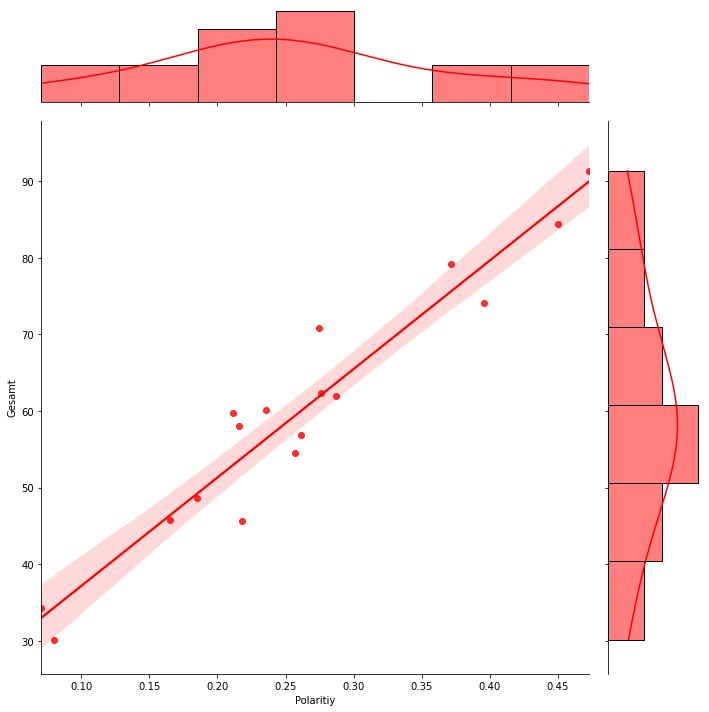

In [30]:
sns.jointplot(x=df_kliniks_mean["Polaritiy"],y=df_kliniks_mean["Gesamt"],data=df_kliniks_mean,kind="reg",color="r",height=10)

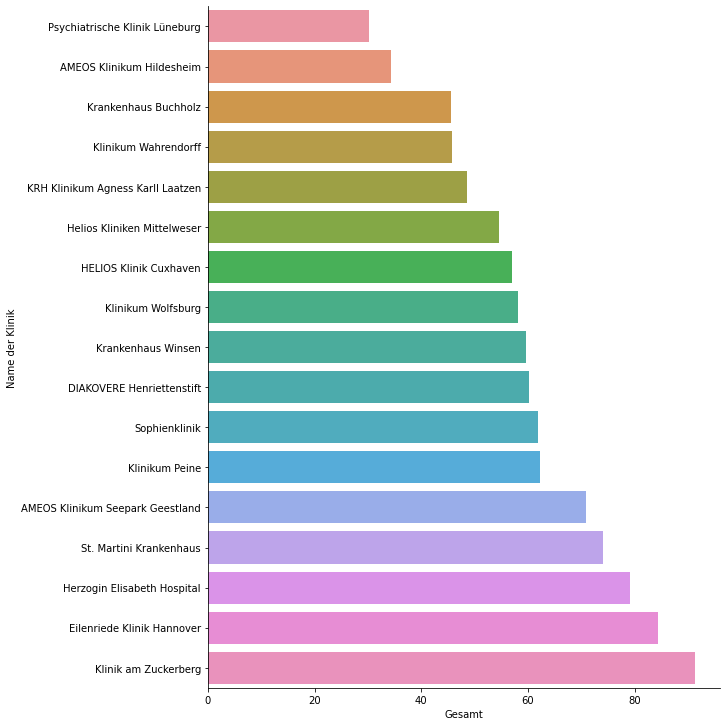

In [31]:
df_kliniks_mean=df_kliniks_mean.sort_values('Gesamt')
sns.catplot(x="Gesamt",y="Name der Klinik",data=df_kliniks_mean,kind="bar",height=10)

<h2 id="basic_grouping">Grouping by Fachbereich</h2>

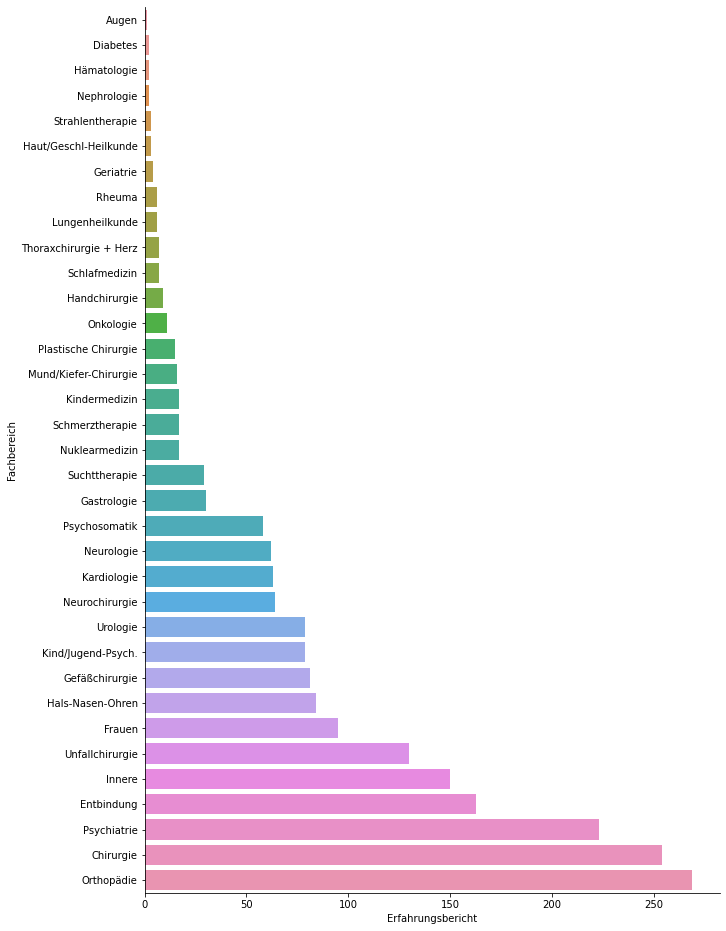

In [32]:
df_fachbereich_count=df.groupby(['Fachbereich'],as_index=False).count()
df_fachbereich_count=df_fachbereich_count[['Fachbereich','Erfahrungsbericht']]
df_fachbereich_count=df_fachbereich_count.sort_values('Erfahrungsbericht')
#df_fachbereich_count
g=sns.catplot(x="Erfahrungsbericht",y="Fachbereich",data=df_fachbereich_count,kind="bar",height=10)
g.fig.set_size_inches(10,13)

In [113]:
df_fachbereich_count.sort_values('Erfahrungsbericht').tail(16)

,Fachbereich,Erfahrungsbericht
5,Gastrologie,30
26,Psychosomatik,58
20,Neurologie,62
13,Kardiologie,63
19,Neurochirurgie,64
14,Kind/Jugend-Psych.,79
34,Urologie,79
6,Gefäßchirurgie,81
8,Hals-Nasen-Ohren,84
4,Frauen,95


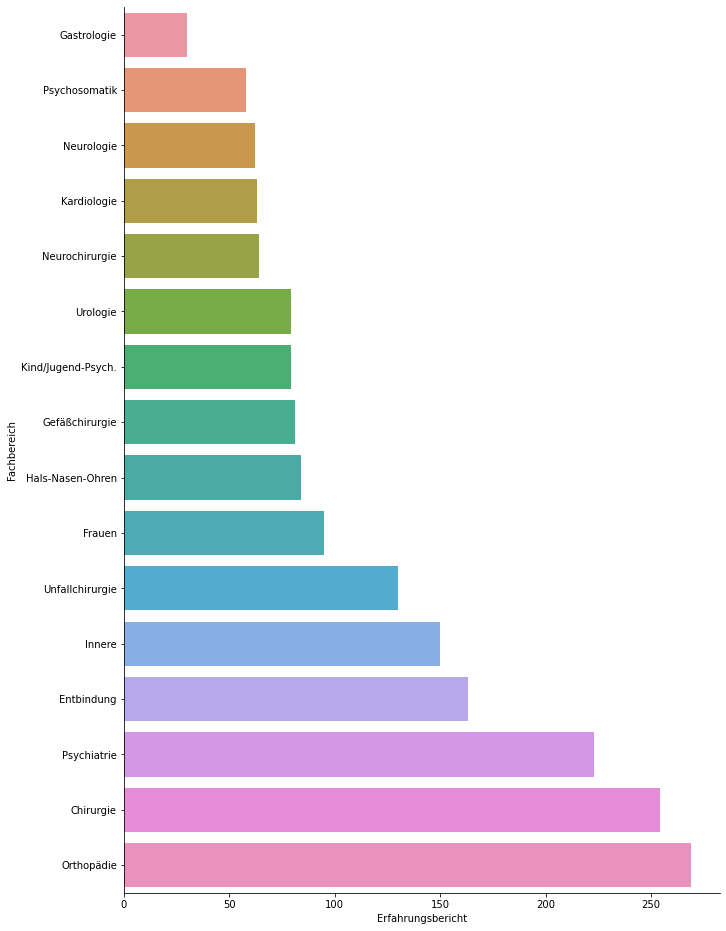

In [114]:
g=sns.catplot(x="Erfahrungsbericht",y="Fachbereich",data=df_fachbereich_count.tail(16),kind="bar",height=10)
g.fig.set_size_inches(10,13)

<h2 id="basic_grouping">Grouping by Year</h2>

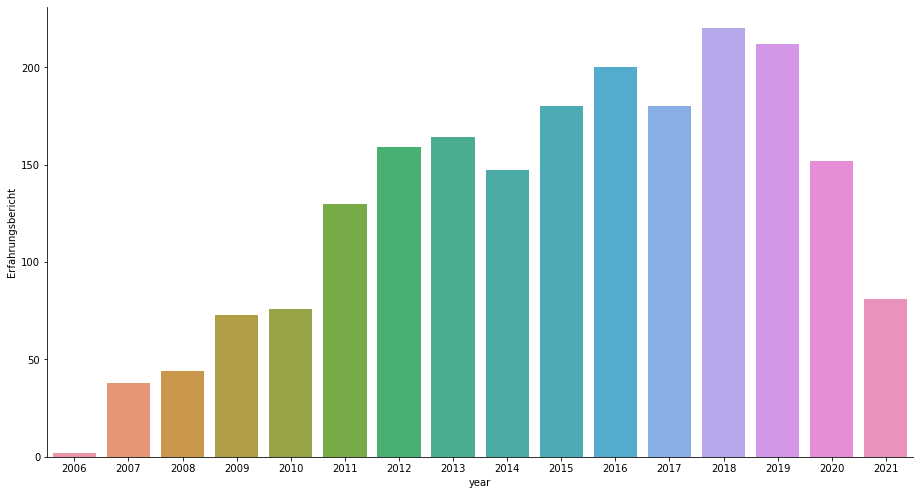

In [33]:
df_year_count=df.groupby(['year'],as_index=False).count()
df_year_count=df_year_count[['year','Erfahrungsbericht']]
df_year_count
g=sns.catplot(x="year",y="Erfahrungsbericht",data=df_year_count,kind="bar")
g.fig.set_size_inches(14,7)

In [115]:
df.groupby(['year'],as_index=False).mean()

,year,Polaritiy,Subjectivity,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive
0,2006,0.514583,0.000000,5.500000,27.000000,100.000000,83.500000,83.500000,83.500000,100.000000,1.000000
1,2007,0.339074,0.044226,8.368421,16.184211,60.552632,62.342105,67.605263,55.236842,60.552632,0.789474
2,2008,0.334936,0.052912,6.500000,16.068182,64.431818,68.204545,77.272727,57.636364,64.431818,0.795455
3,2009,0.229463,0.053930,6.698630,16.095890,61.643836,61.150685,60.739726,57.589041,61.643836,0.821918
4,2010,0.208522,0.041923,6.671053,16.118421,53.539474,60.539474,60.565789,54.421053,53.539474,0.697368
5,2011,0.189158,0.055090,6.961538,15.646154,46.915385,48.723077,54.869231,49.800000,46.915385,0.738462
6,2012,0.207062,0.047618,6.320755,15.377358,58.295597,61.867925,63.528302,58.339623,58.295597,0.742138
7,2013,0.232238,0.053200,6.262195,15.725610,55.518293,56.951220,62.835366,52.896341,55.518293,0.786585
8,2014,0.262049,0.062713,6.782313,16.108844,58.306122,61.918367,64.632653,55.836735,58.306122,0.775510
9,2015,0.260595,0.053827,6.733333,14.983333,64.638889,69.250000,74.633333,63.744444,62.672222,0.755556


<h2 id="basic_grouping">Klinik by Klinik</h2>

In [34]:
df["Name der Klinik"].unique()

array(['Herzogin Elisabeth Hospital', 'Klinik am Zuckerberg',
       'Klinikum Wolfsburg', 'Klinikum Peine', 'St. Martini Krankenhaus',
       'DIAKOVERE Henriettenstift', 'Eilenriede Klinik Hannover',
       'Sophienklinik', 'KRH Klinikum Agness Karll Laatzen',
       'Klinikum Wahrendorff', 'AMEOS Klinikum Hildesheim',
       'Helios Kliniken Mittelweser', 'HELIOS Klinik Cuxhaven',
       'AMEOS Klinikum Seepark Geestland', 'Krankenhaus Buchholz',
       'Krankenhaus Winsen', 'Psychiatrische Klinik Lüneburg'],
      dtype=object)

In [81]:
df["year"].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006])

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


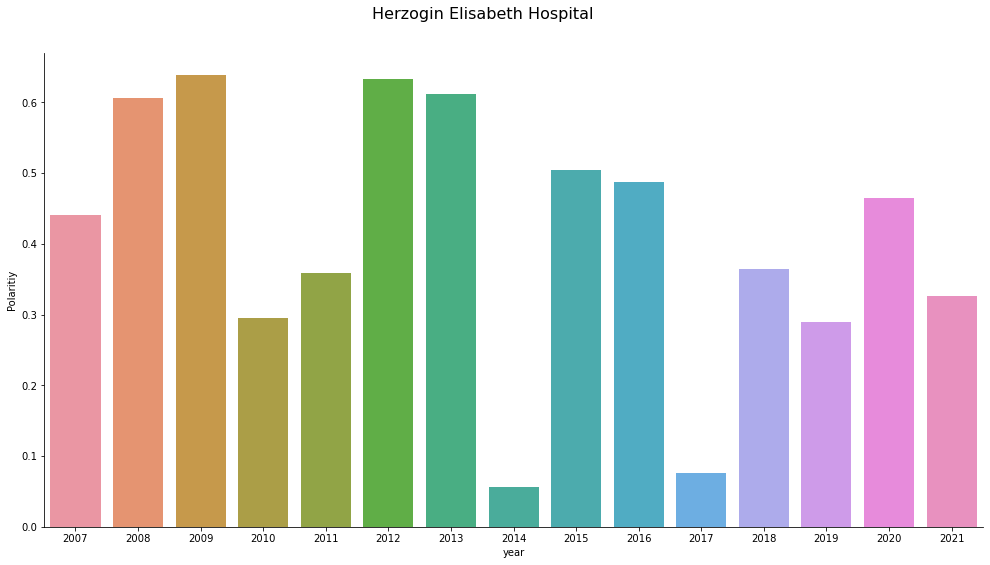

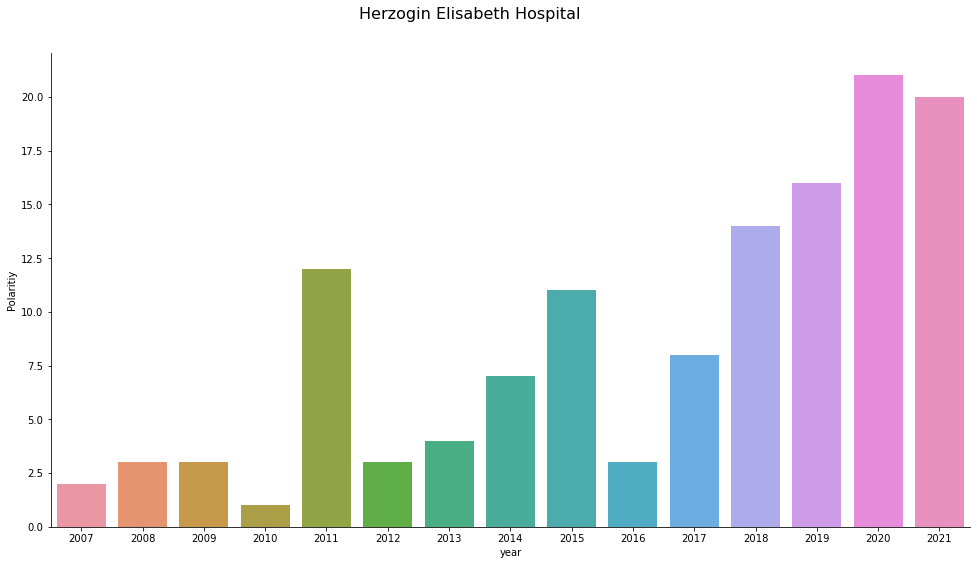

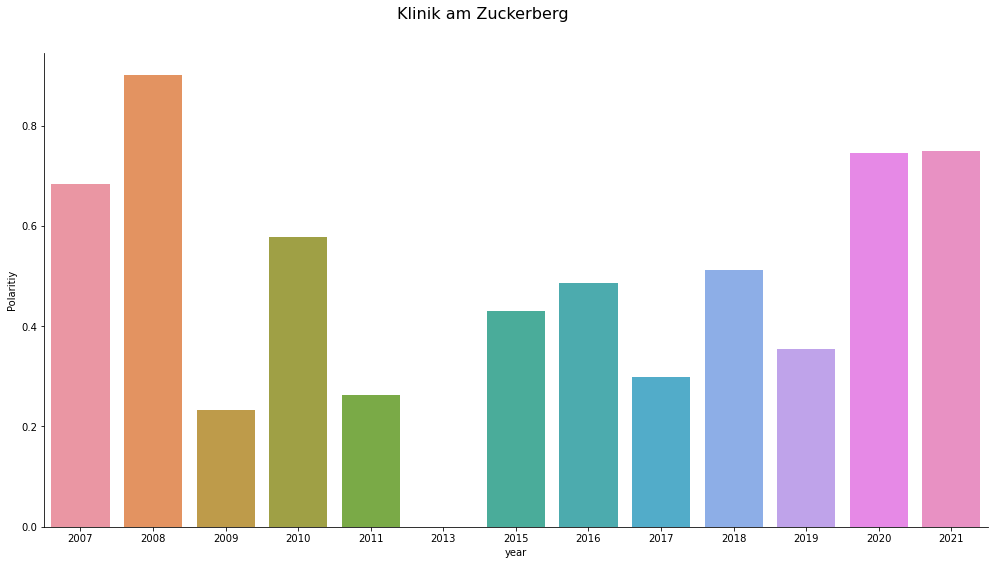

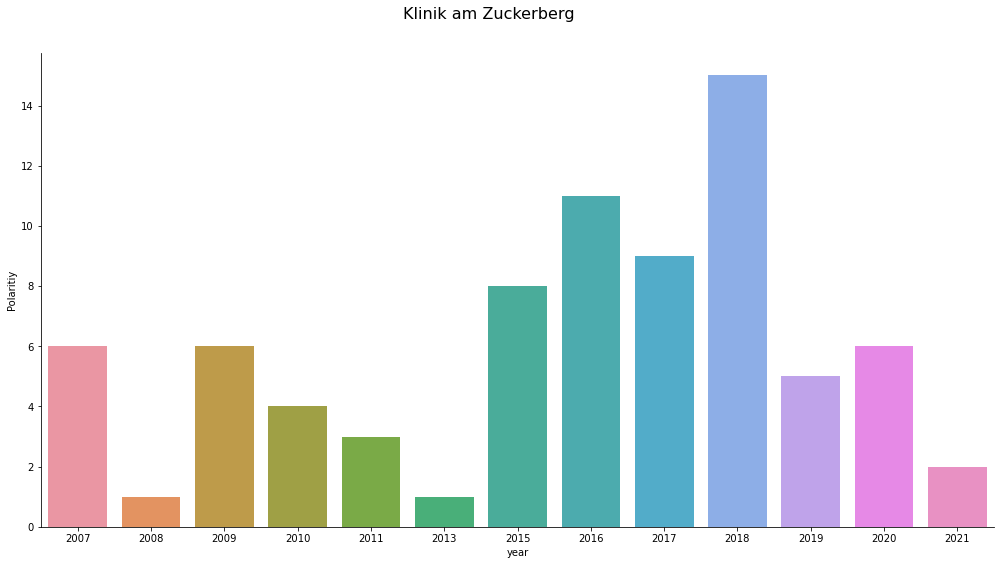

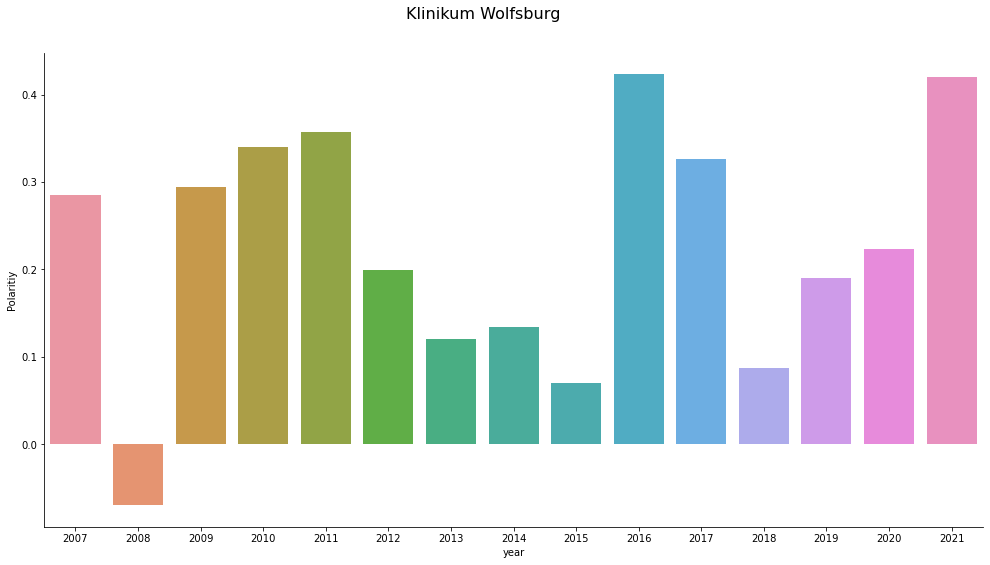

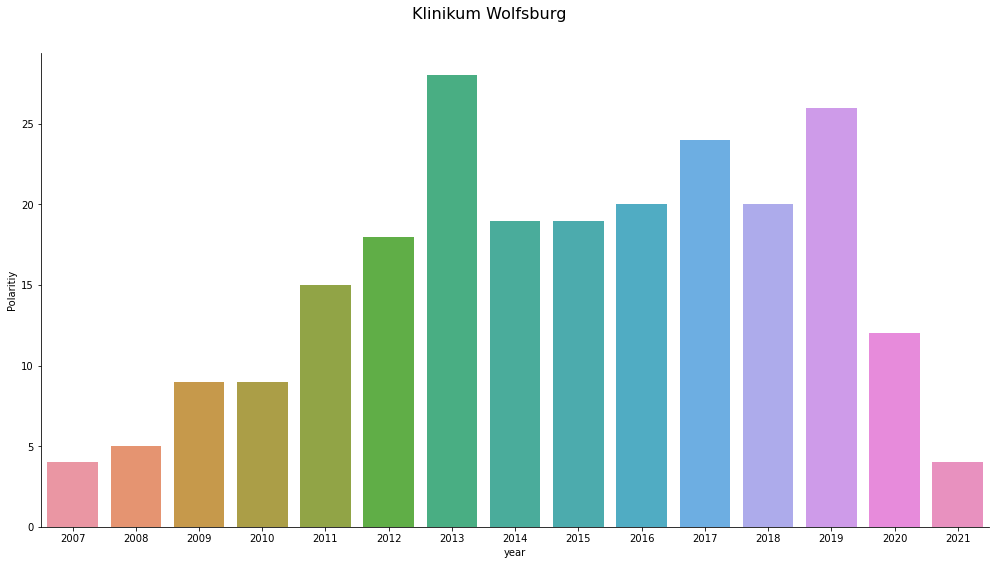

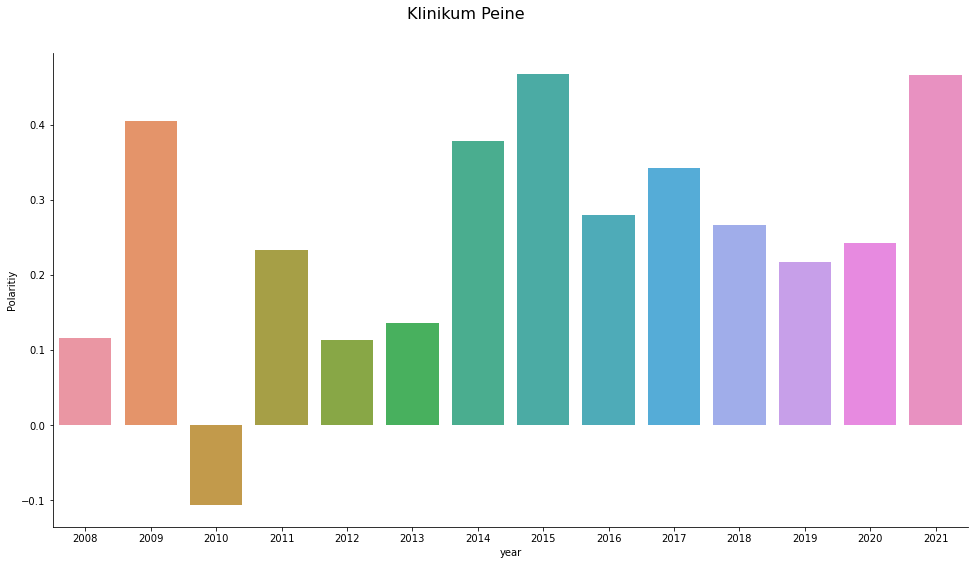

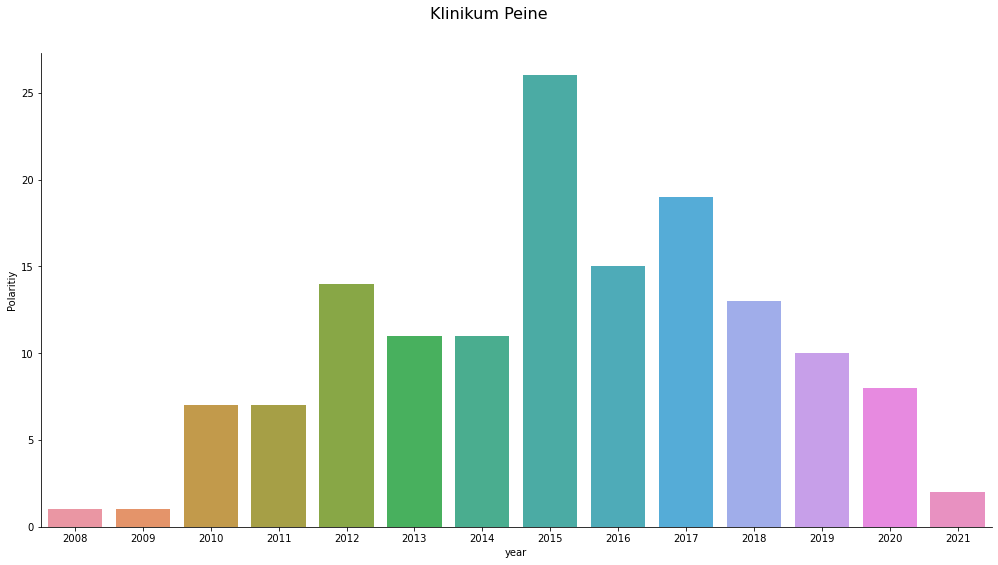

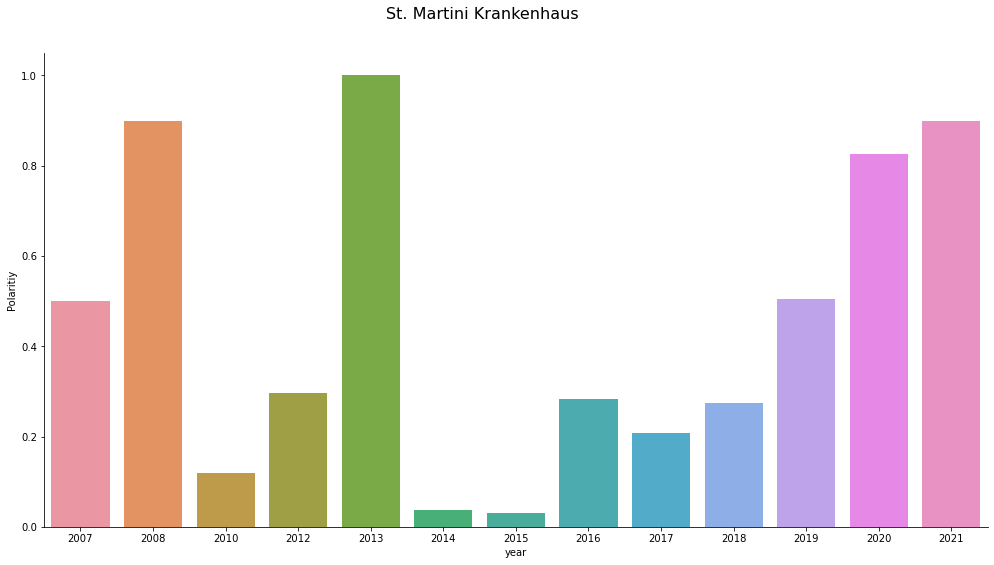

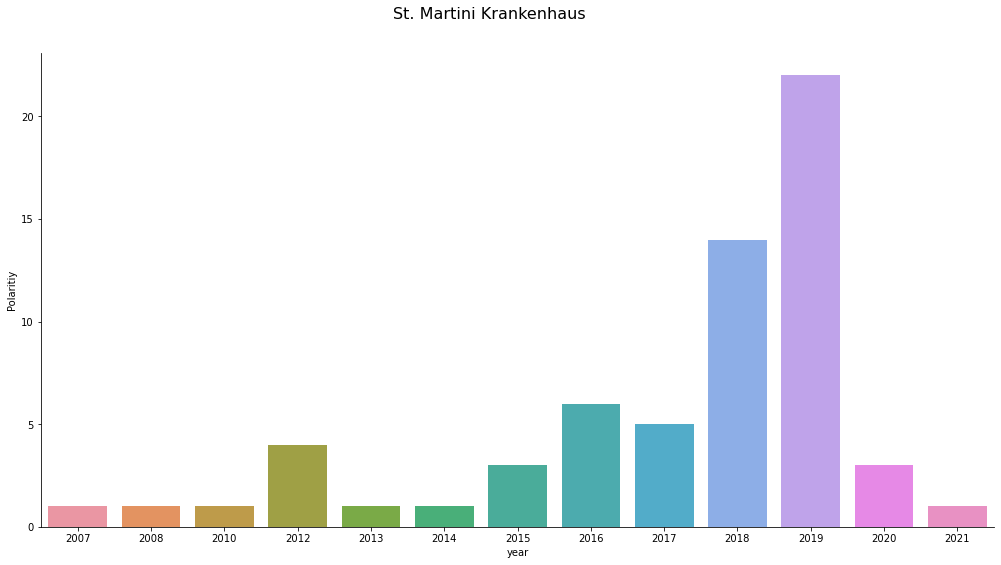

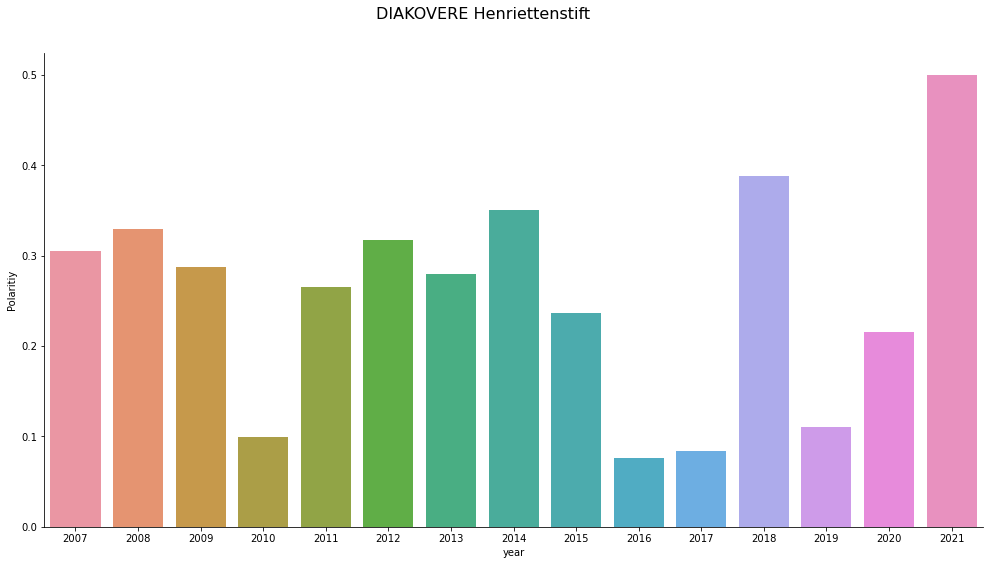

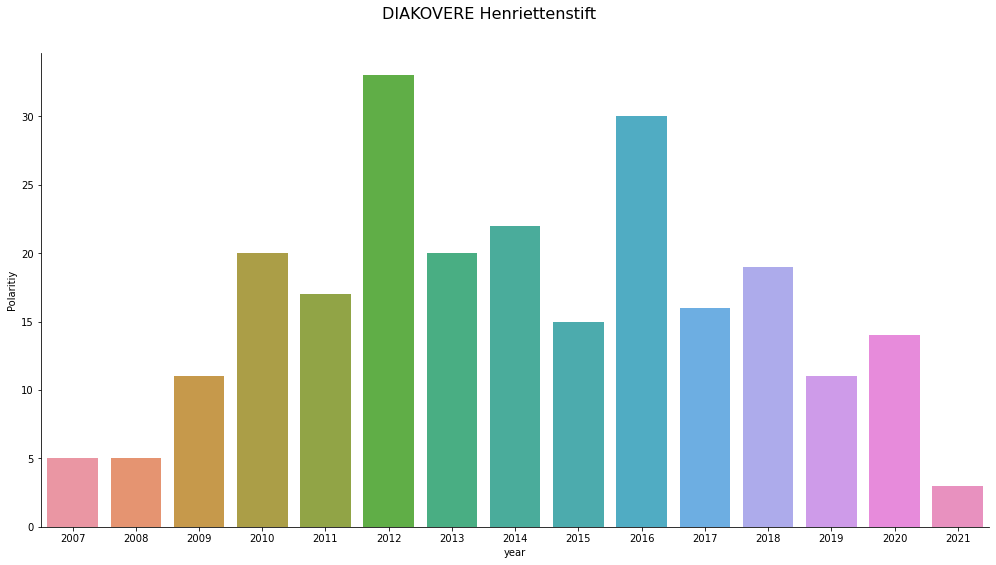

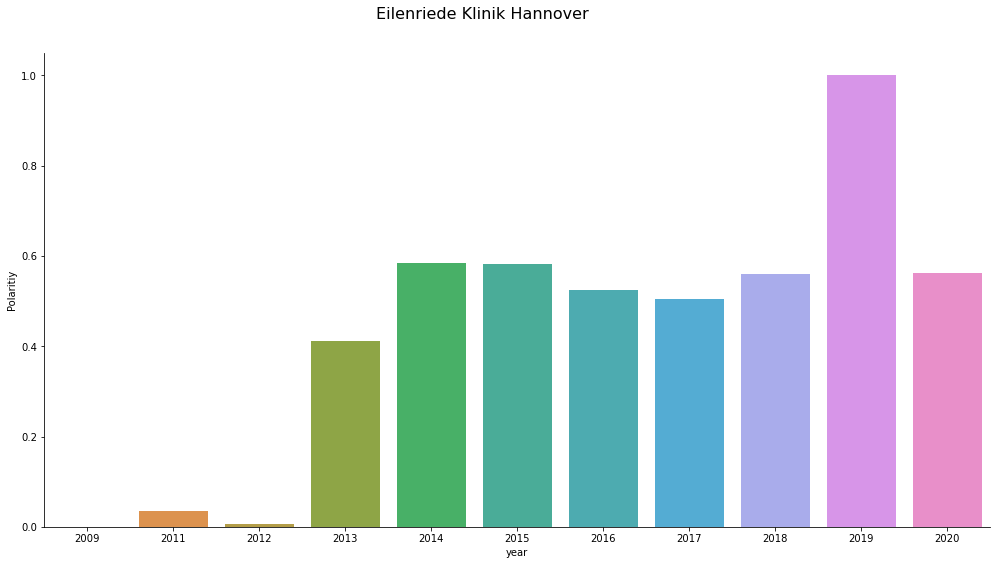

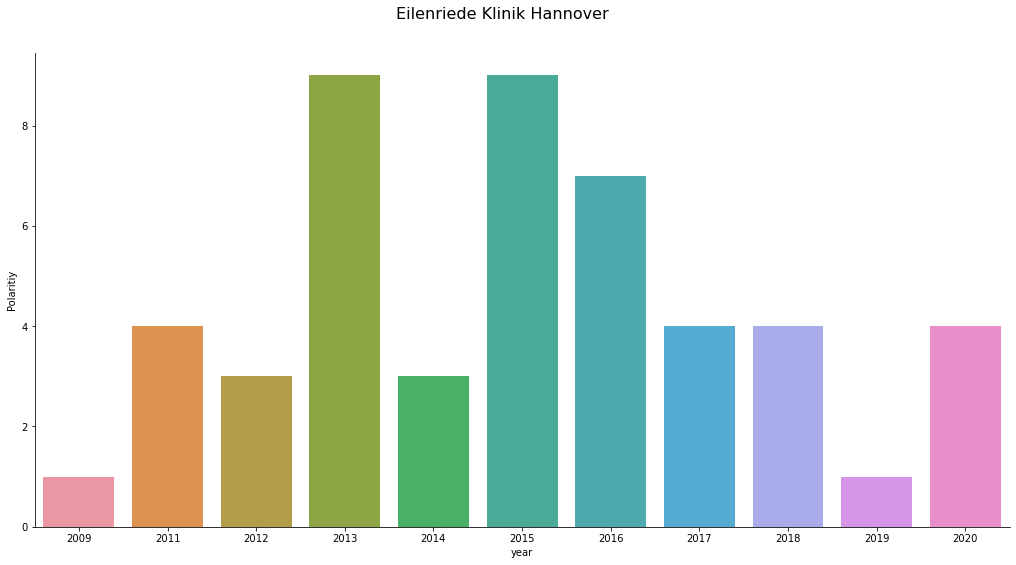

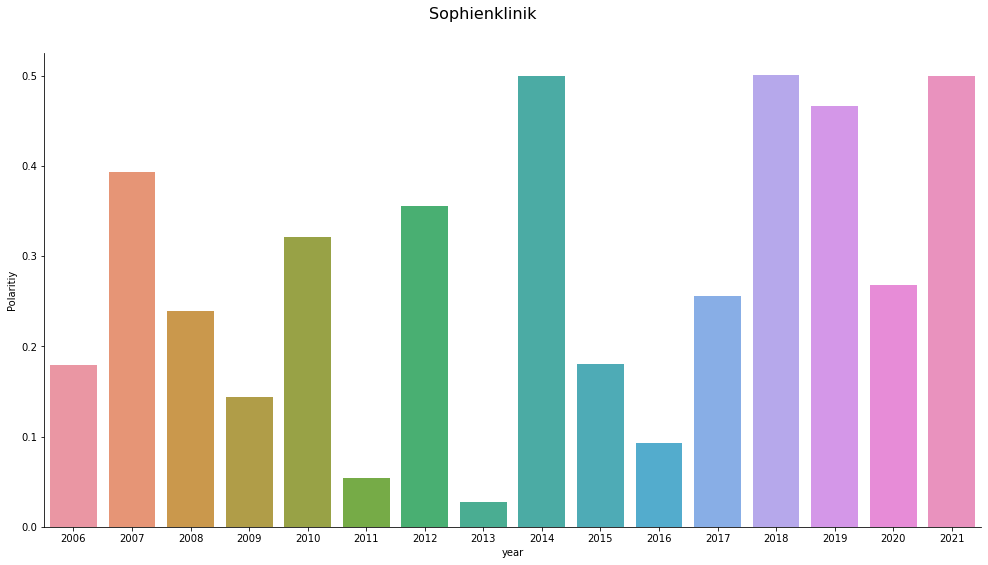

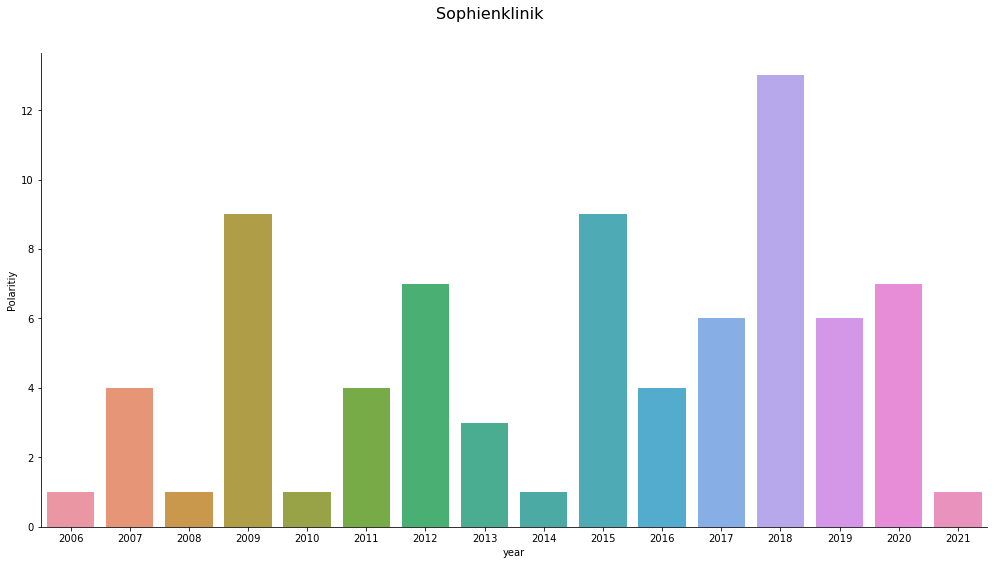

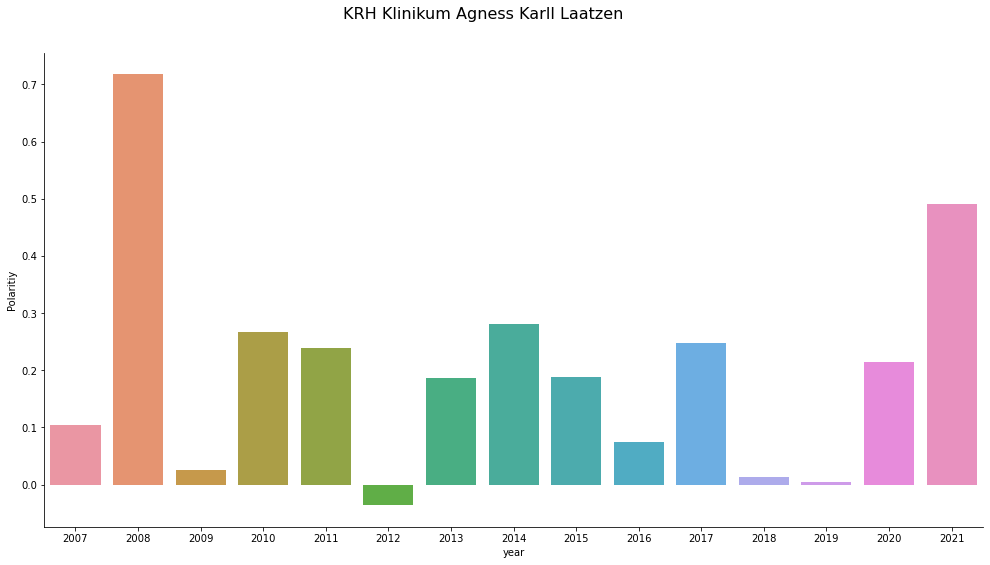

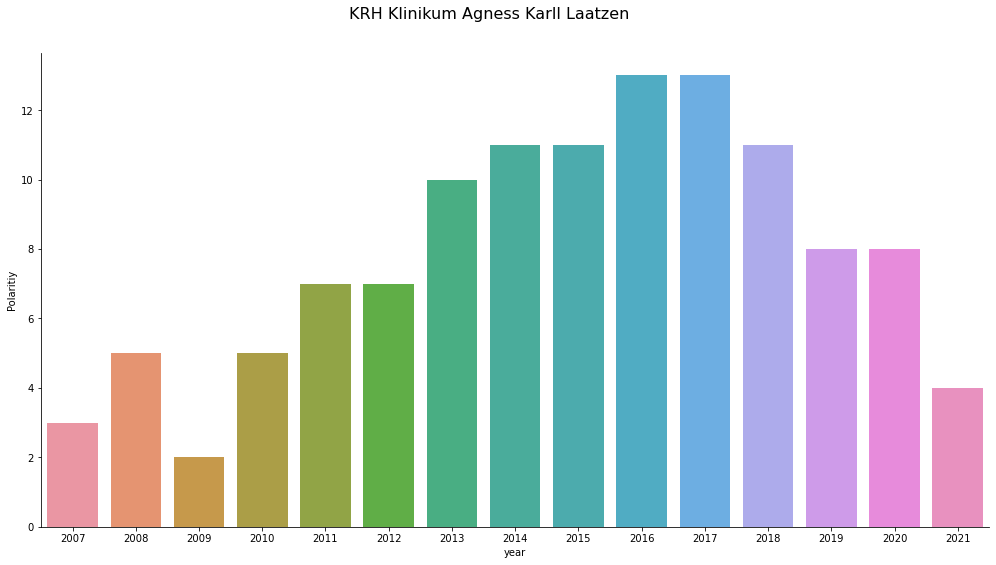

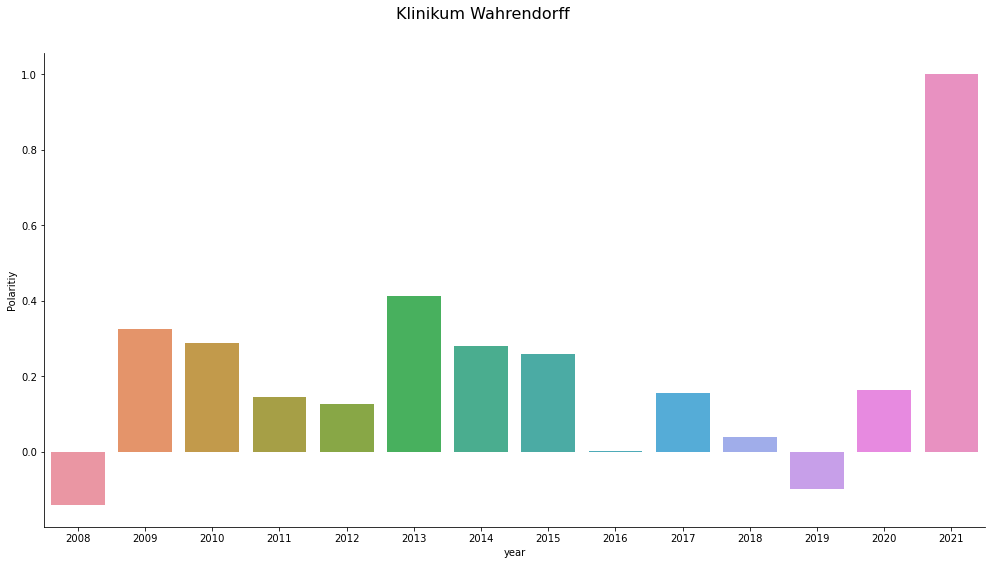

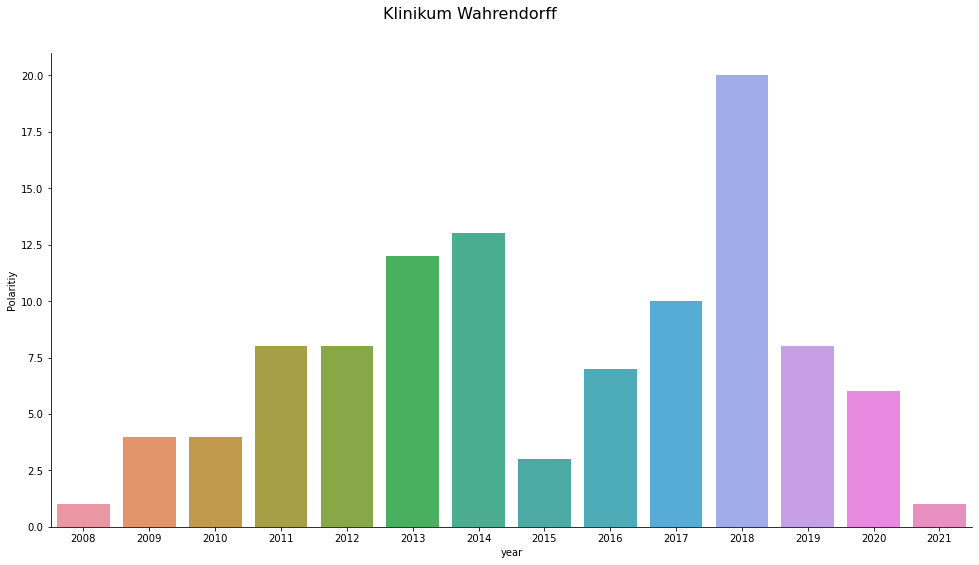

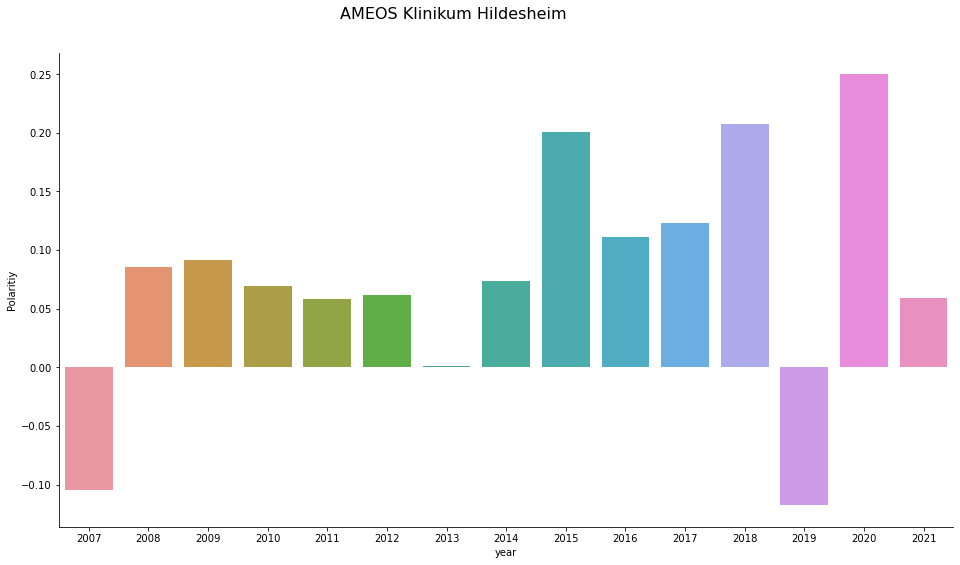

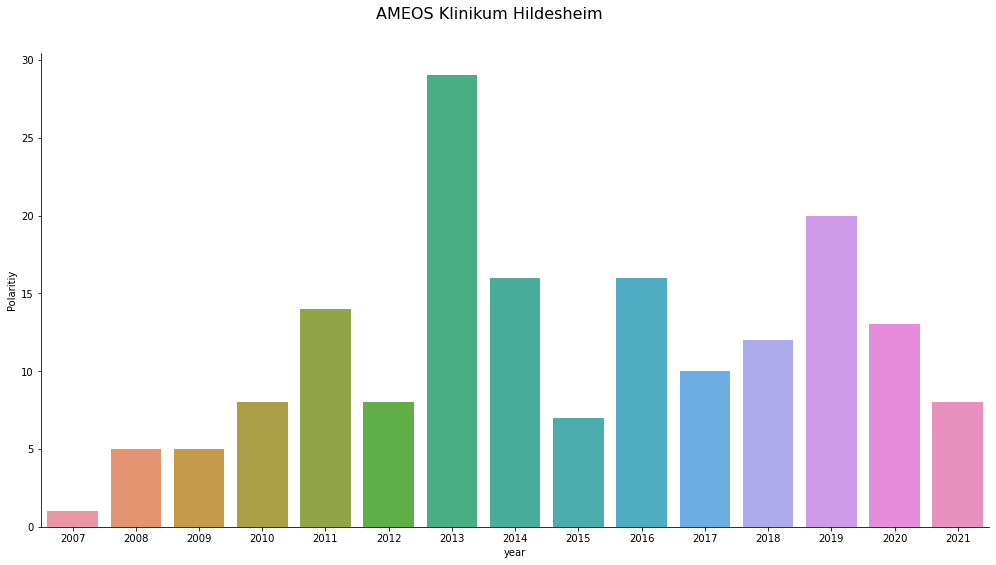

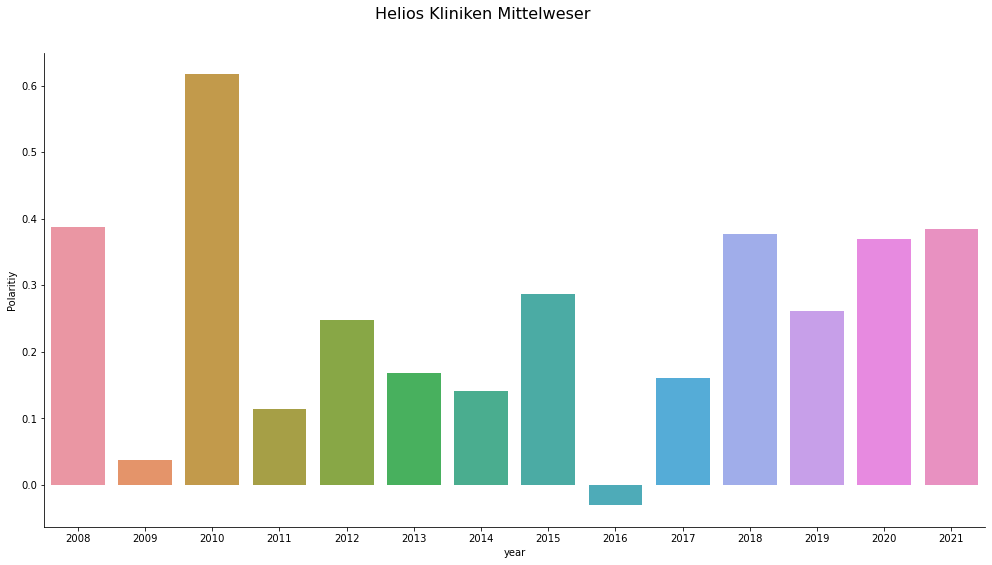

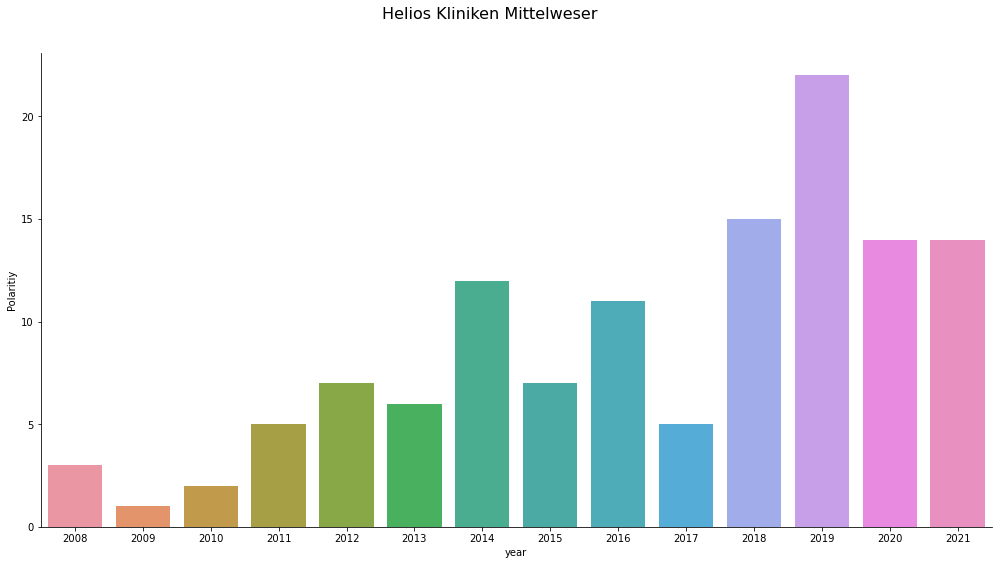

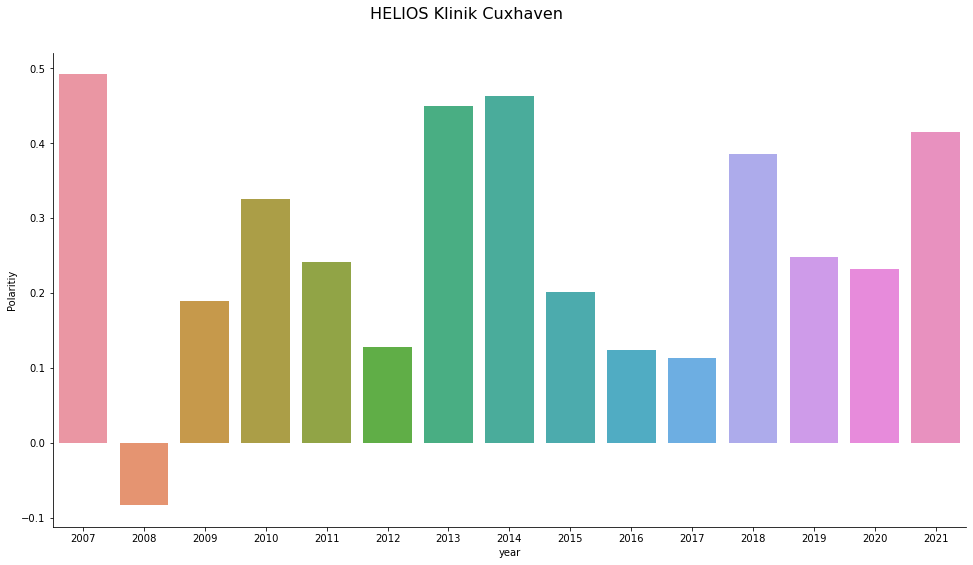

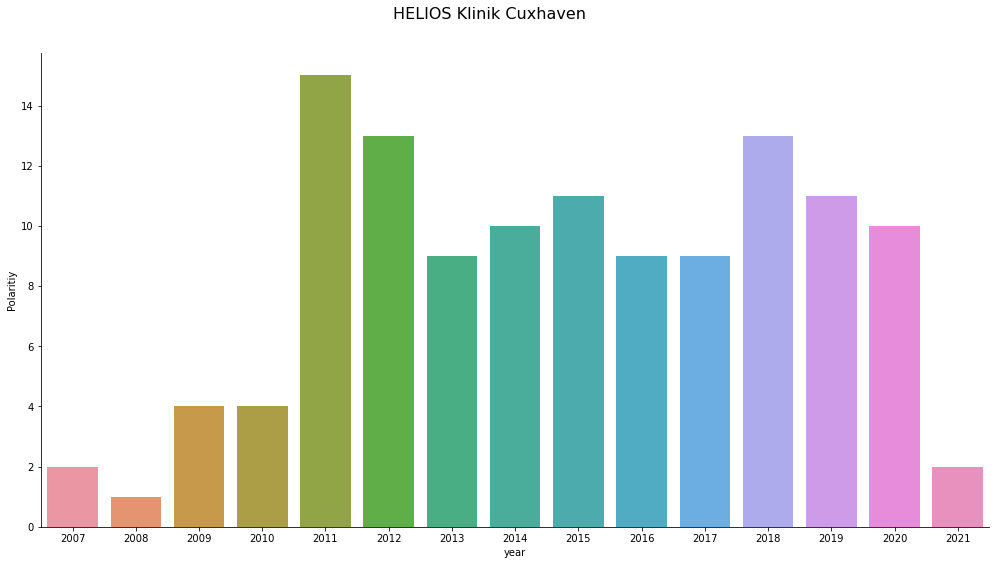

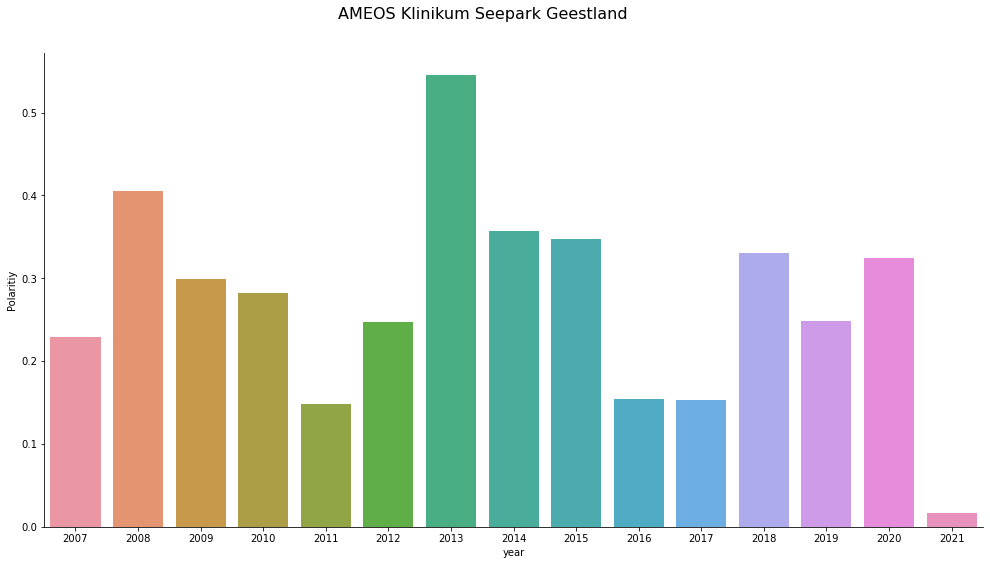

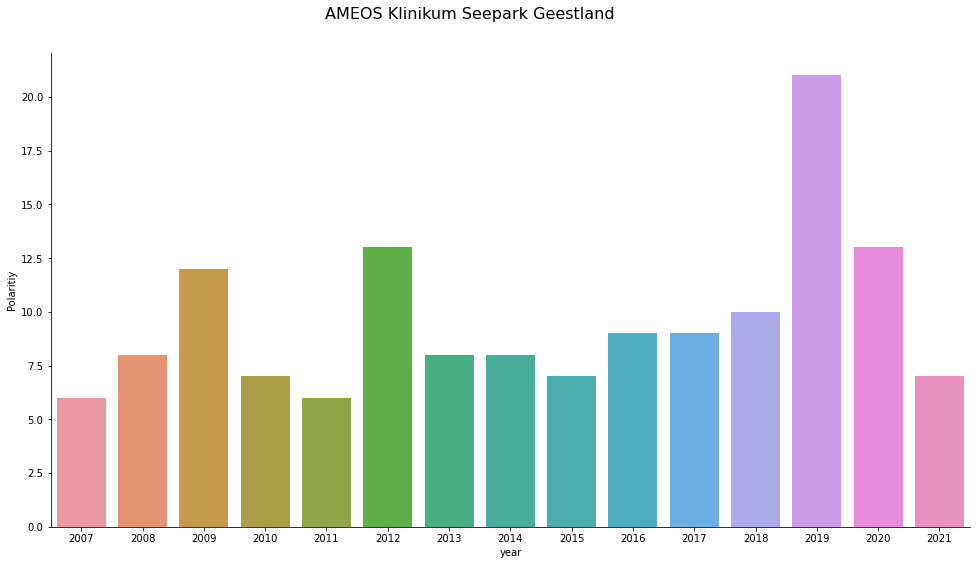

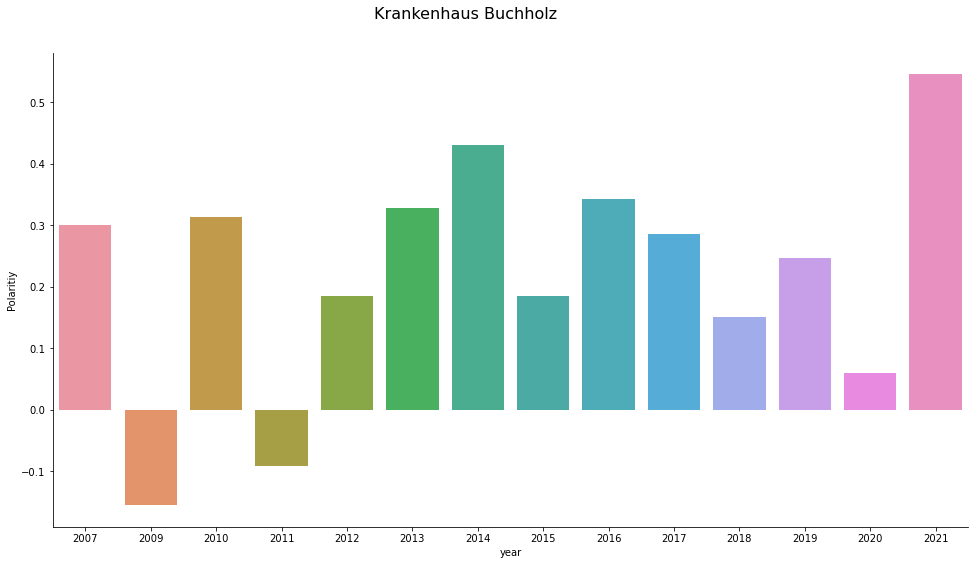

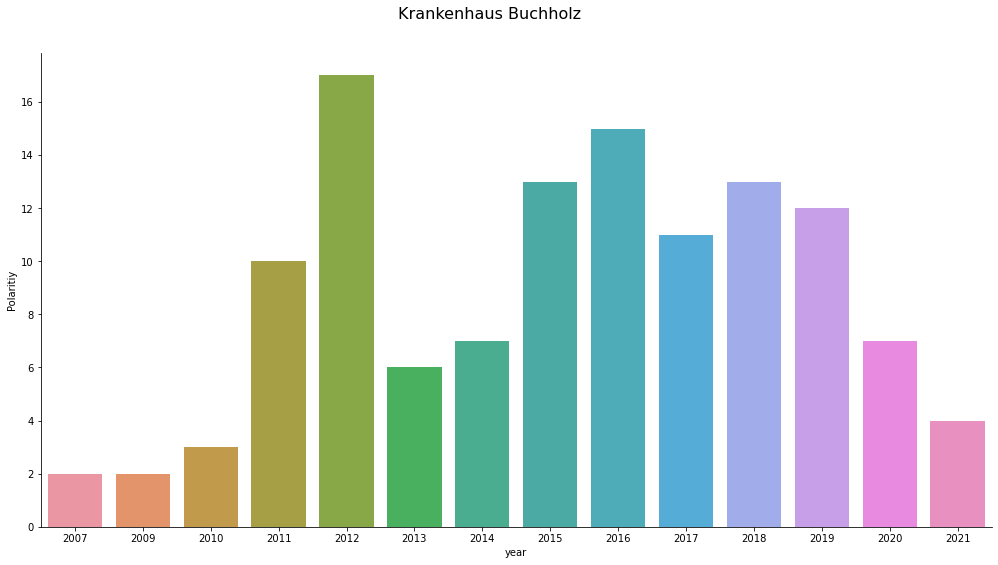

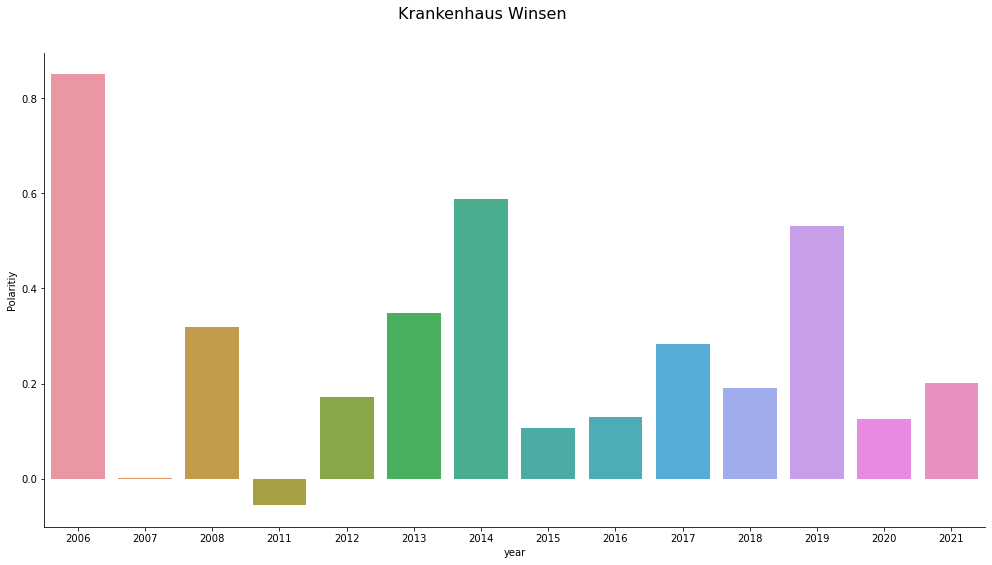

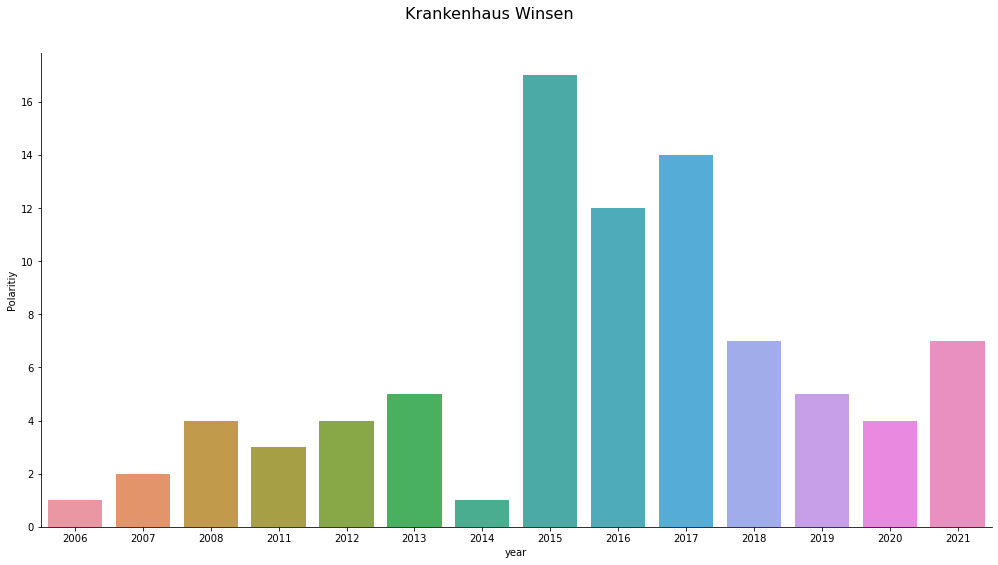

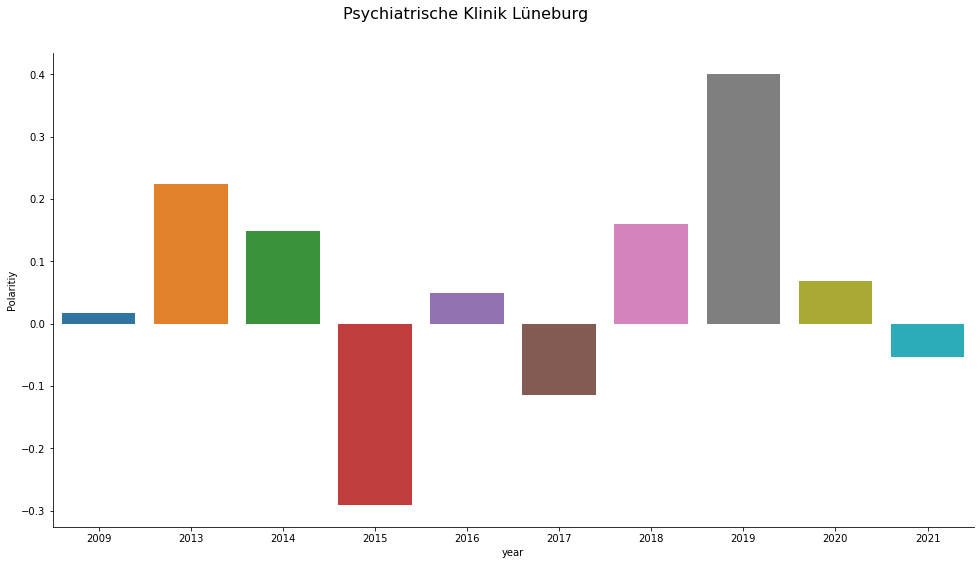

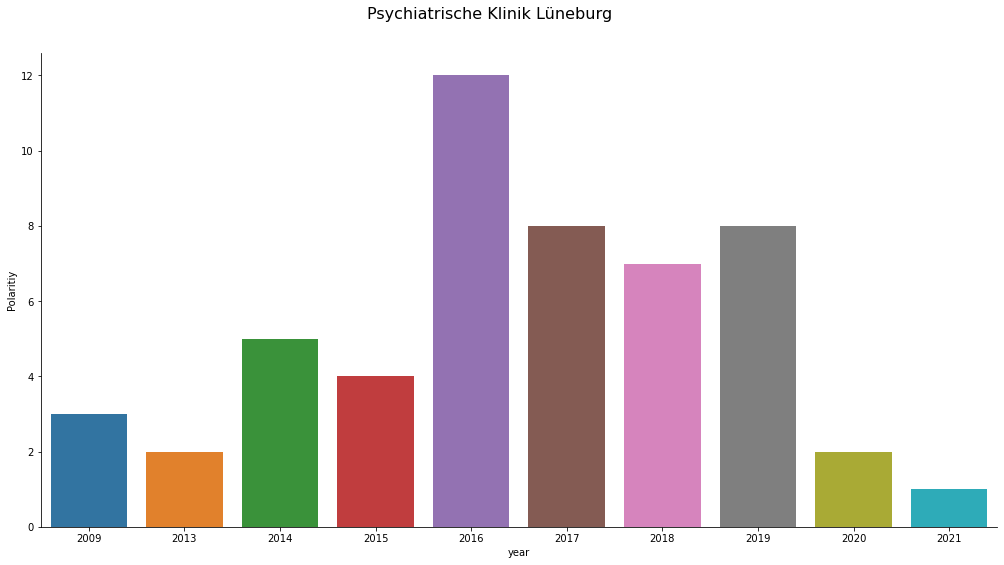

In [35]:
for klinik in df["Name der Klinik"].unique():
    
    g=sns.catplot(x="year",y="Polaritiy",data=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).mean(),kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(klinik, fontsize=16)
    name="Images/KlinikByKlinik/PolaritiyProJahr/PolaritiyProJahr_"+klinik+".png"
    #g.fig.savefig(name)

    g=sns.catplot(x="year",y="Polaritiy",data=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count(),kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(klinik, fontsize=16)
    name="Images/KlinikByKlinik/KommentareProJahr/KommentareProJahr_"+klinik+".png"
    #g.fig.savefig(name)



In [45]:
for klinik in df["Name der Klinik"].unique():
    first=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count()['year'][0]
    end=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count()['year'][len(df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count()['year'])-1]
    pos,neg=[],[]
    for i in range(first,end):
        pos.append(len(df[(df["Name der Klinik"]==klinik) & (df["positive"]==1) & (df["year"]==i)]))
        neg.append(len(df[(df["Name der Klinik"]==klinik) & (df["positive"]==0)& (df["year"]==i)]))
    
    print(klinik)    
    print(pos)
    print(neg)
    years = [i for i in range(first,end)]
    len(years)
    d = {'pos': pos, 'neg':neg} 
    temp_df = pd.DataFrame(data=d)
    temp_df.index=years

    
    """temp_df.index = temp_df.index.map(int)
    temp_df.plot(kind='area',
                 colormap='',
                 stacked=True,
                 figsize=(10, 5) # pass a tuple (x, y) size
                 )

    plt.title(klinik)
    plt.ylabel('Number of Rezensions')
    plt.xlabel('Years')
    
    name="Images/KlinikByKlinik/PositiveNegativeProJahr/PositiveNegativeProJahr_"+klinik+".png"
    #plt.savefig(name)

    plt.show()
    """

Herzogin Elisabeth Hospital
[1, 2, 3, 1, 11, 3, 4, 3, 11, 3, 5, 14, 14, 19]
[1, 1, 0, 0, 1, 0, 0, 4, 0, 0, 3, 0, 2, 2]
Klinik am Zuckerberg
[6, 1, 5, 3, 3, 0, 1, 0, 8, 11, 7, 13, 5, 6]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0]
Klinikum Wolfsburg
[4, 3, 8, 7, 14, 15, 18, 14, 13, 16, 22, 13, 19, 8]
[0, 2, 1, 2, 1, 3, 10, 5, 6, 4, 2, 7, 7, 4]
Klinikum Peine
[1, 1, 3, 6, 9, 7, 9, 25, 10, 14, 11, 7, 5]
[0, 0, 4, 1, 5, 4, 2, 1, 5, 5, 2, 3, 3]
St. Martini Krankenhaus
[1, 1, 0, 1, 0, 3, 1, 1, 1, 4, 3, 11, 21, 3]
[0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 3, 1, 0]
DIAKOVERE Henriettenstift
[4, 5, 9, 11, 13, 28, 18, 18, 9, 15, 11, 16, 9, 10]
[1, 0, 2, 9, 4, 5, 2, 4, 6, 15, 5, 3, 2, 4]
Eilenriede Klinik Hannover
[1, 0, 2, 1, 9, 3, 8, 7, 4, 4, 1]
[0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0]
Sophienklinik
[1, 3, 1, 7, 1, 3, 6, 2, 1, 7, 3, 4, 10, 5, 4]
[0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 3, 1, 3]
KRH Klinikum Agness Karll Laatzen
[2, 5, 2, 5, 5, 3, 7, 9, 7, 8, 10, 5, 4, 6]
[1, 0, 0, 0, 2, 4, 3, 2, 4, 5, 3, 6, 4, 2]
K

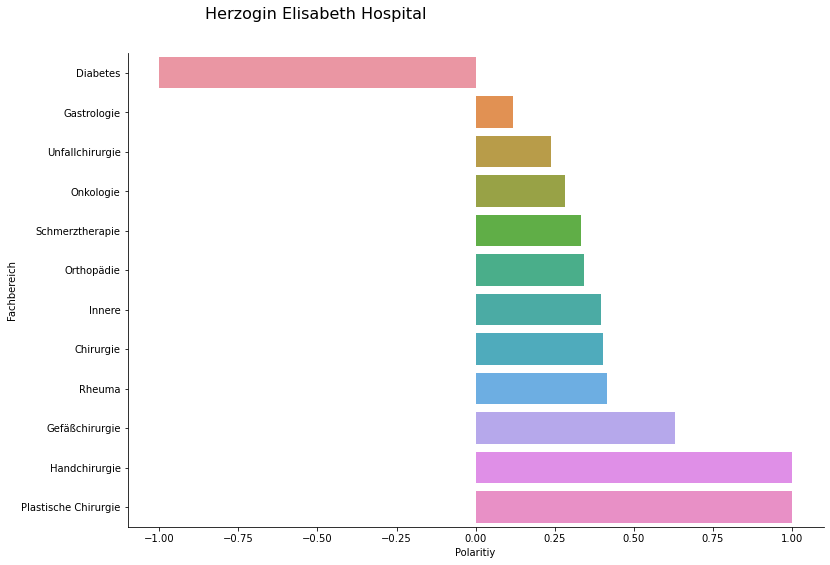

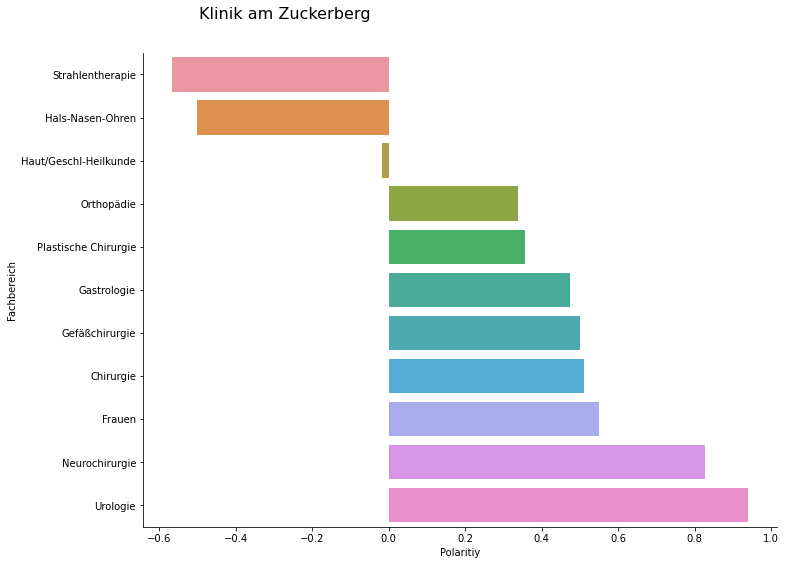

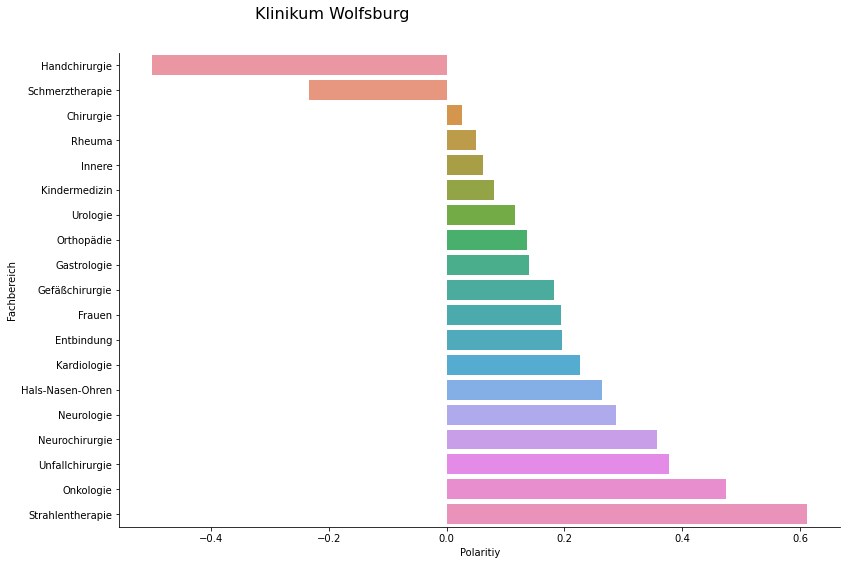

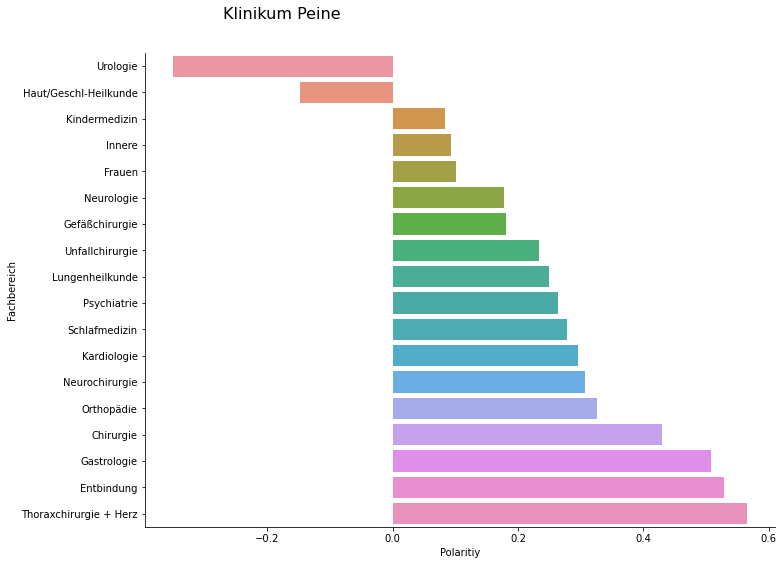

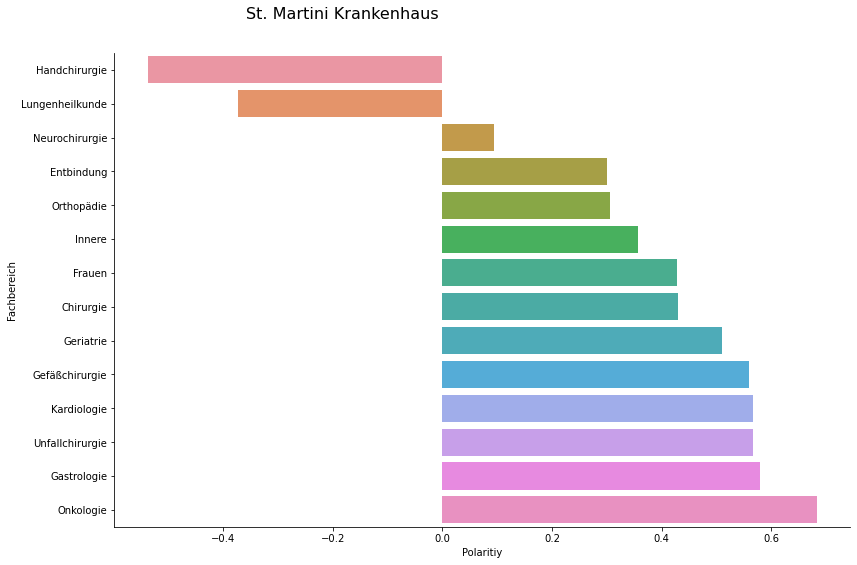

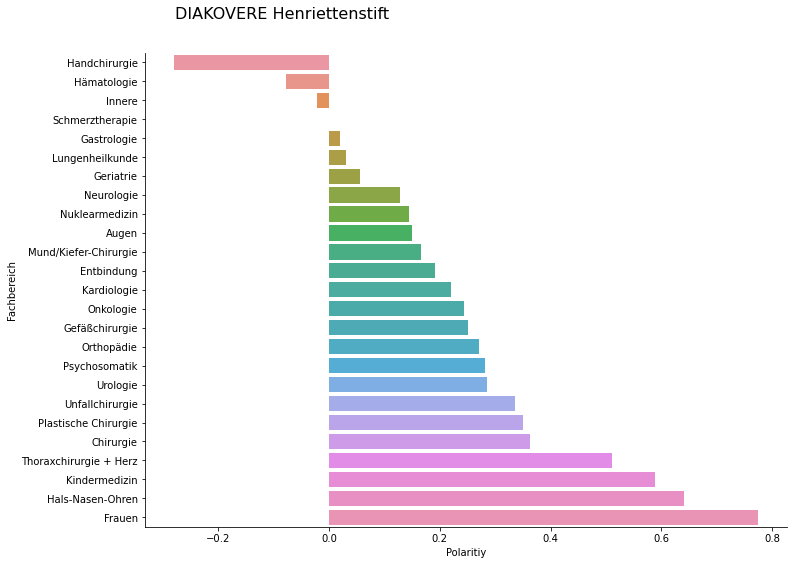

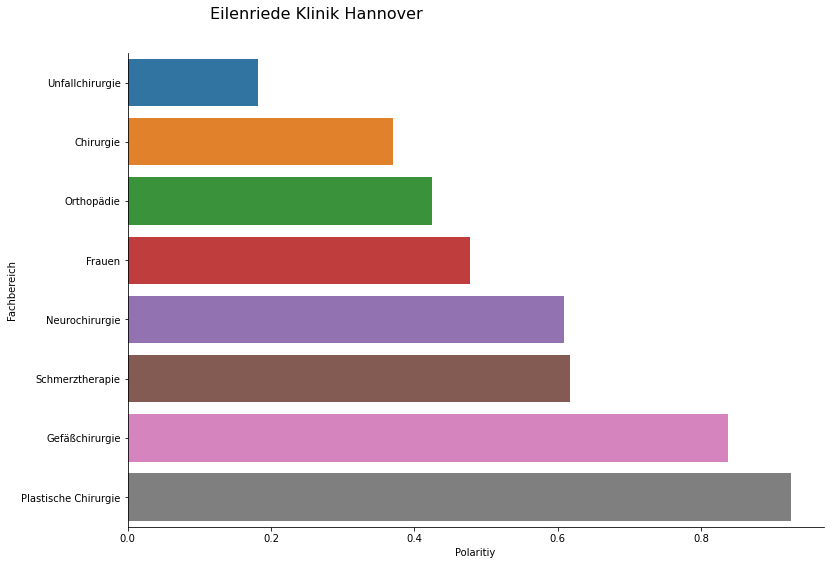

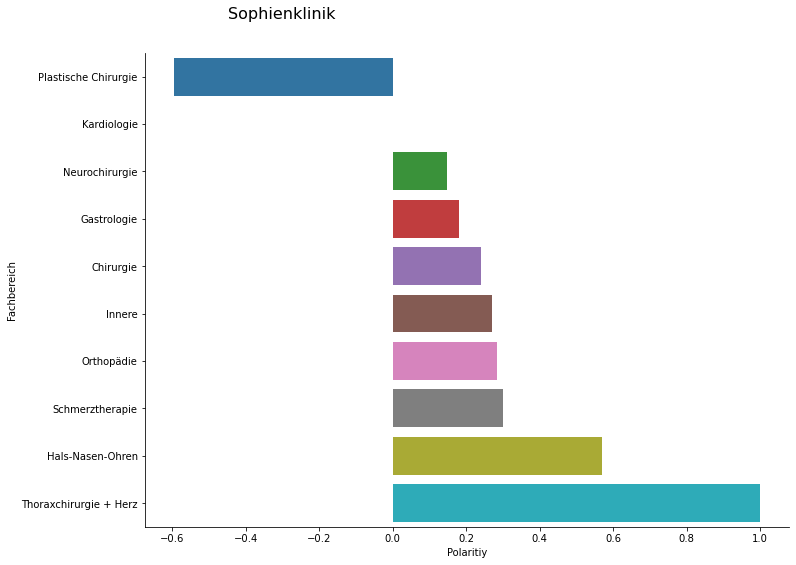

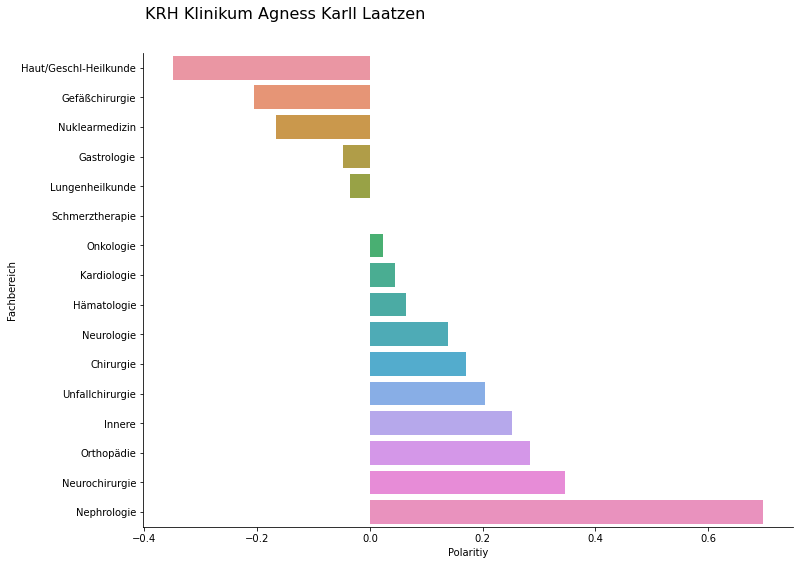

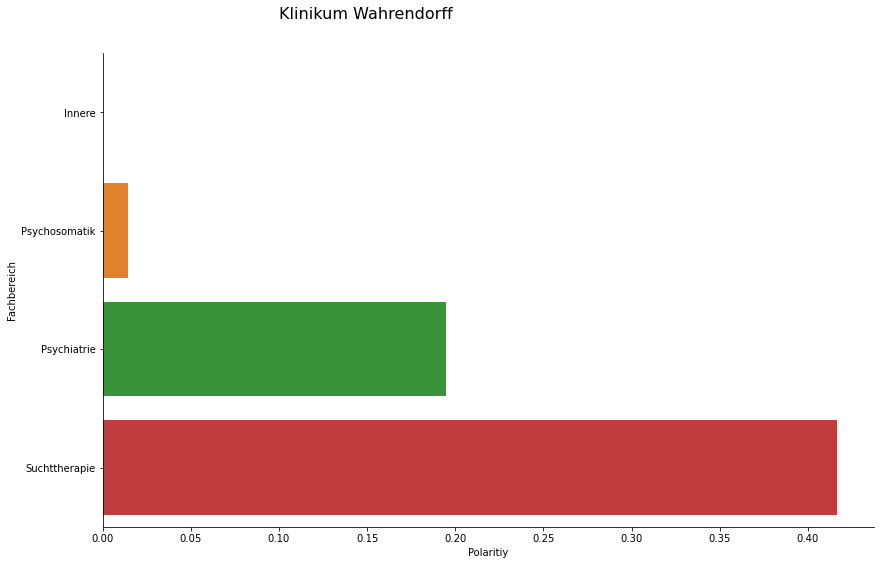

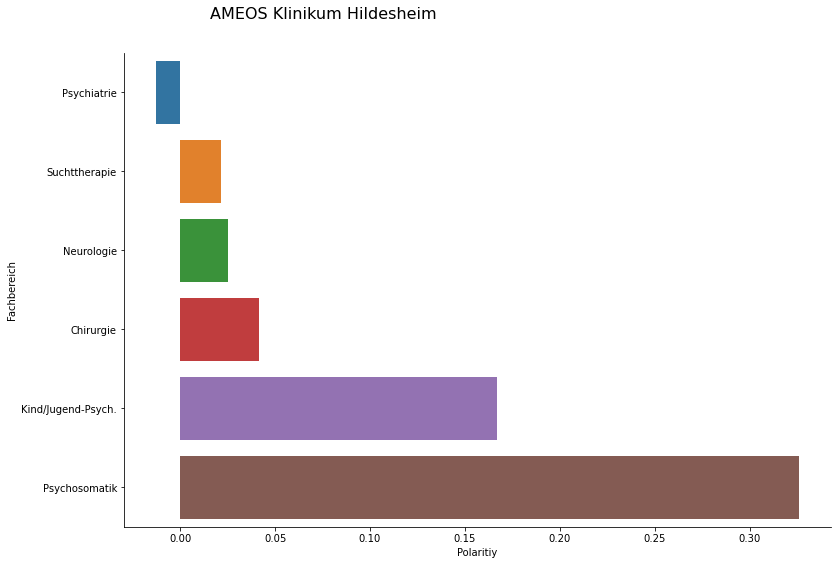

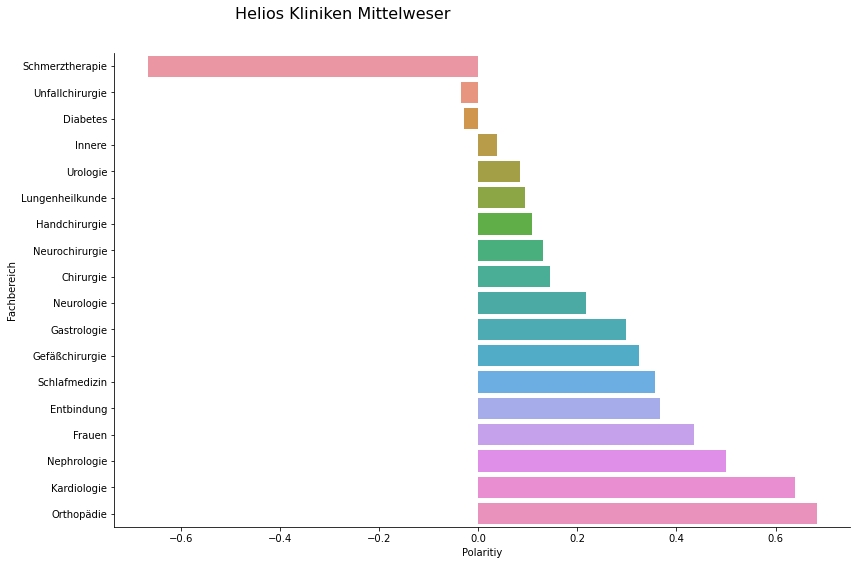

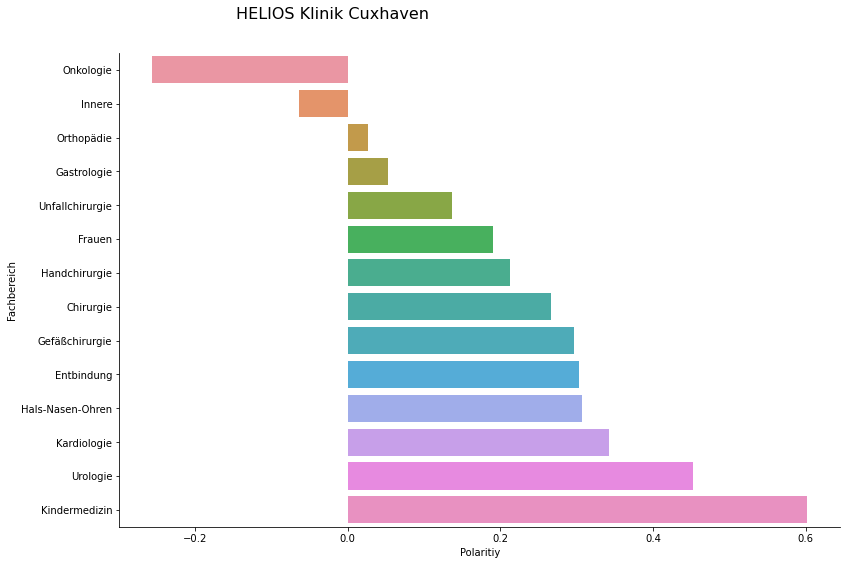

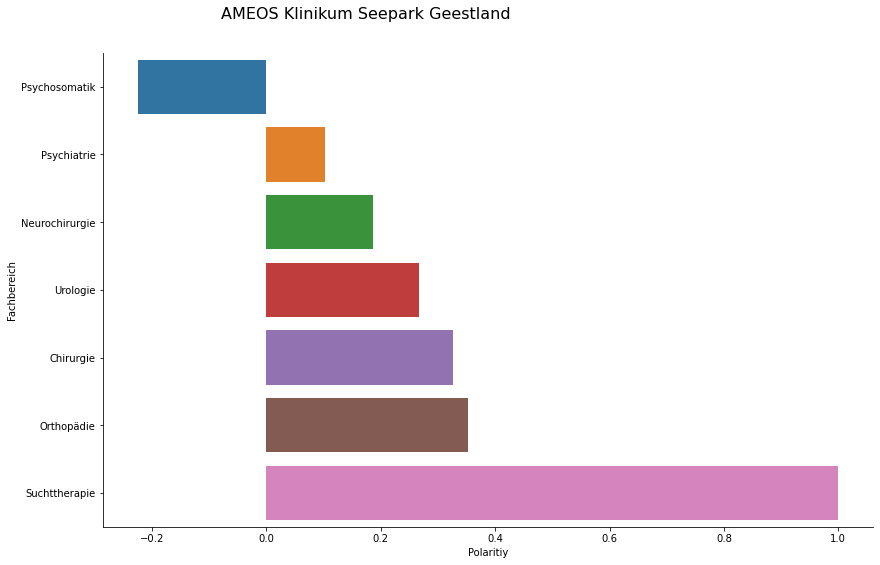

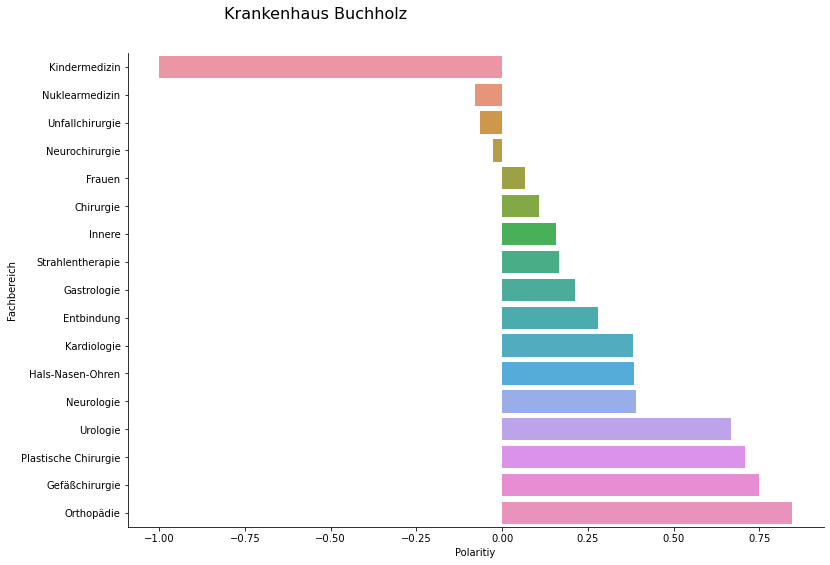

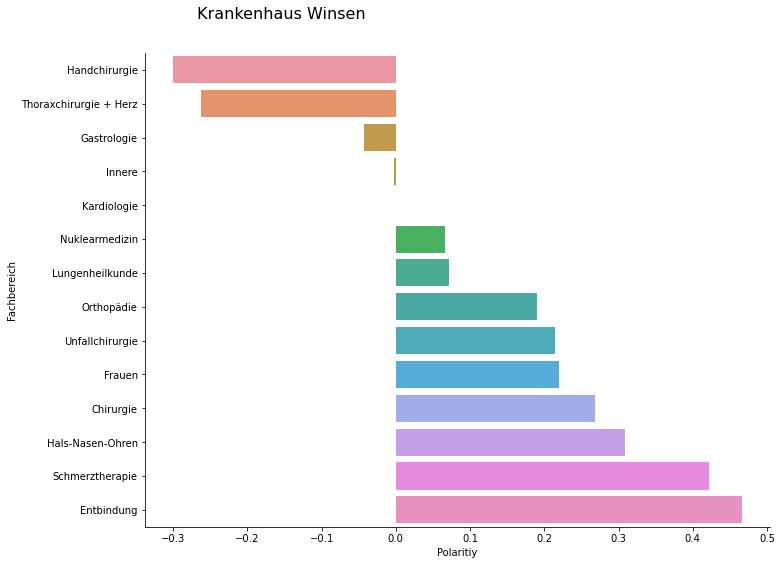

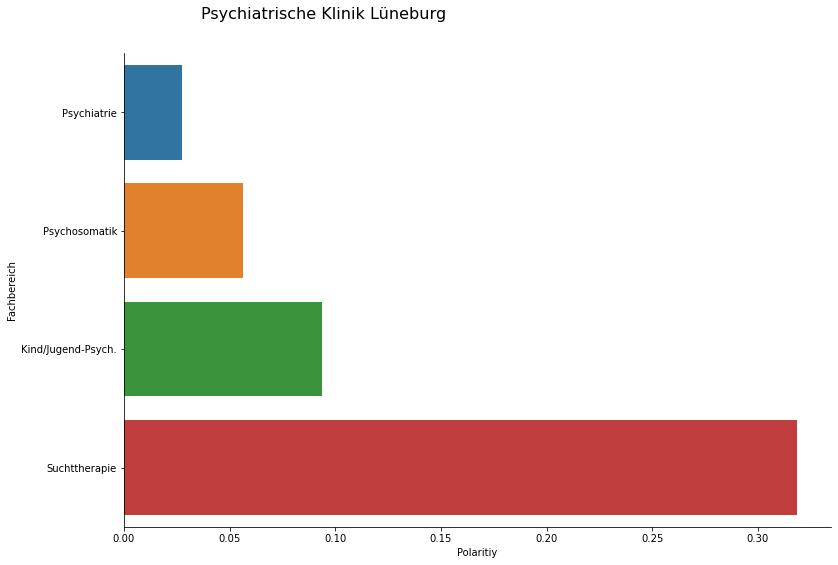

In [46]:
for klinik in df["Name der Klinik"].unique():
    
    g=sns.catplot(x="Polaritiy",y="Fachbereich",data=df[df["Name der Klinik"]==klinik].groupby(['Fachbereich'],as_index=False).mean().sort_values('Polaritiy') ,kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(klinik, fontsize=16)
    name="klinik photos/klinik fachbereich_"+klinik+".png"
    name="Images/KlinikByKlinik/FachbereichPolarities/FachbereichPolarities_"+klinik+".png"
    #g.fig.savefig(name)

<h2 id="basic_grouping">Fach by Fach</h2>

In [47]:
fach_pol_df = df[["Name der Klinik","Fachbereich","Polaritiy",]]
fach_pol_gr_df = fach_pol_df.groupby(["Name der Klinik","Fachbereich"],as_index=False).mean()
fach_pol_gr_df.sort_values(by=['Fachbereich','Polaritiy'],ascending=False).head(30)
top_kliniks=fach_pol_gr_df[fach_pol_gr_df["Fachbereich"]=="Orthopädie"].sort_values(by=['Polaritiy'],ascending=True).head()
top_kliniks

,Name der Klinik,Fachbereich,Polaritiy
57,HELIOS Klinik Cuxhaven,Orthopädie,0.026471
152,Klinikum Wolfsburg,Orthopädie,0.136560
185,Krankenhaus Winsen,Orthopädie,0.190506
31,DIAKOVERE Henriettenstift,Orthopädie,0.269944
103,KRH Klinikum Agness Karll Laatzen,Orthopädie,0.283607


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


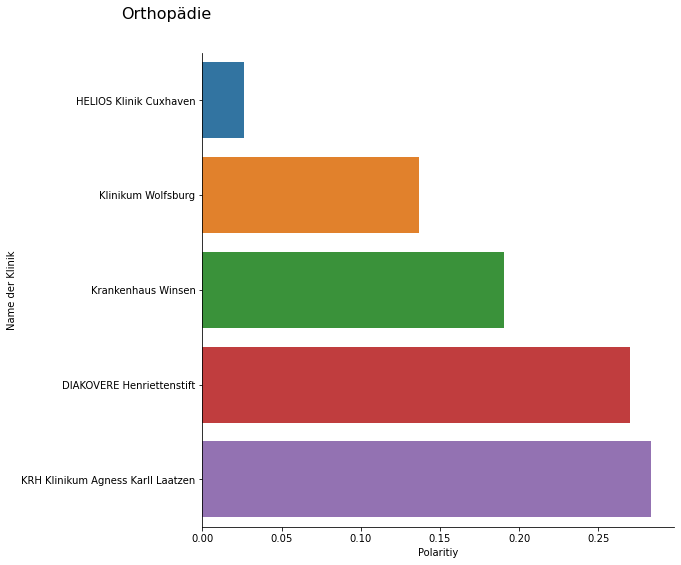

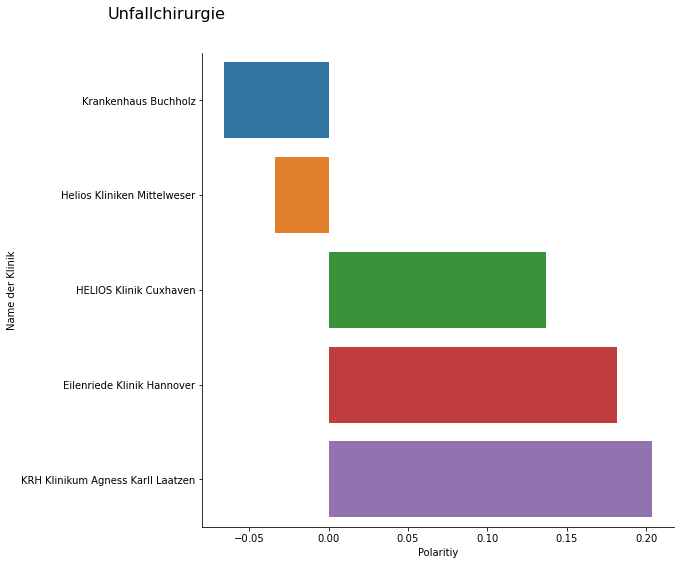

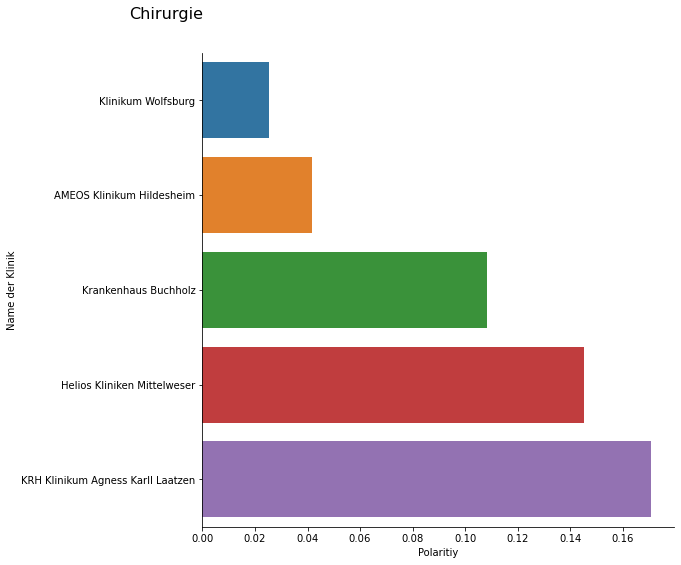

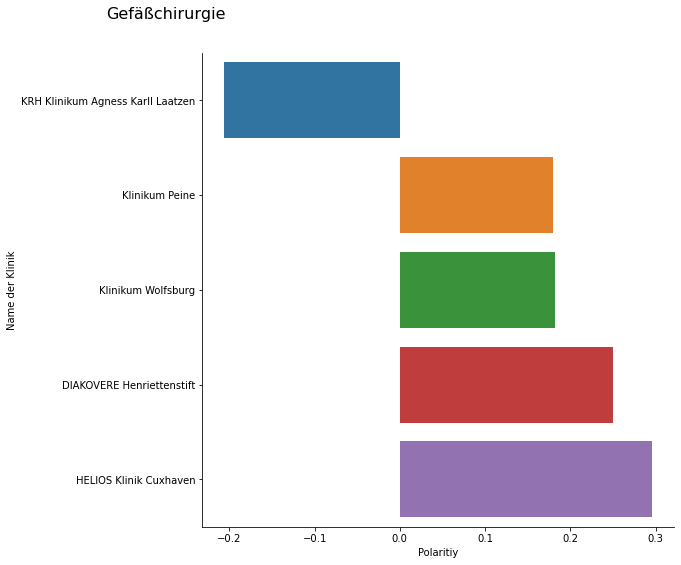

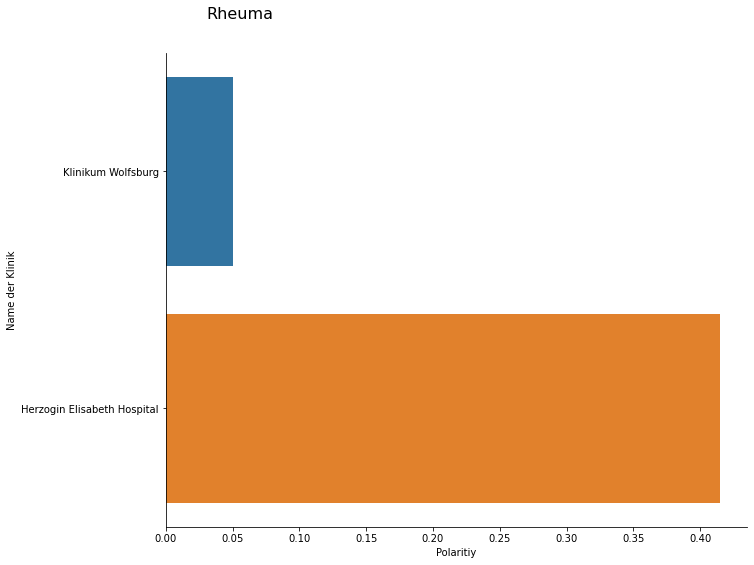

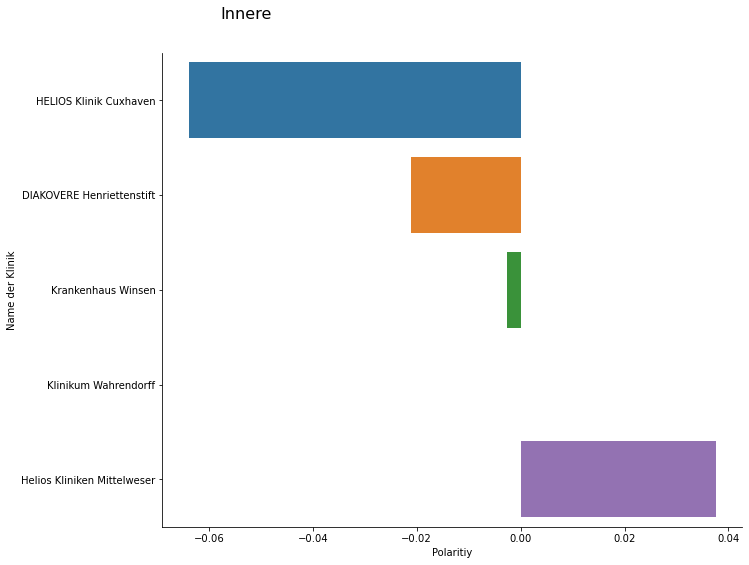

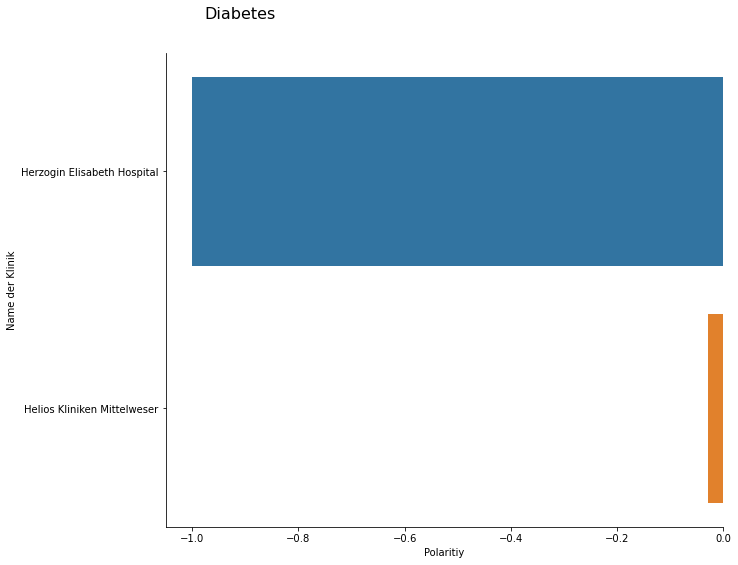

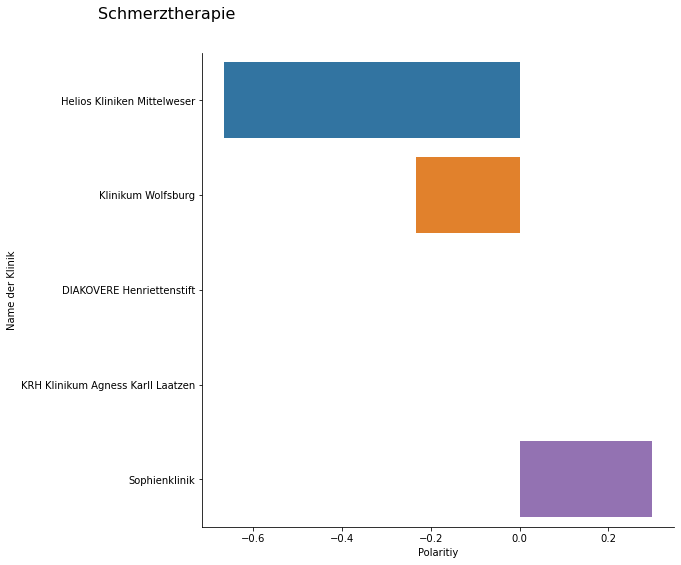

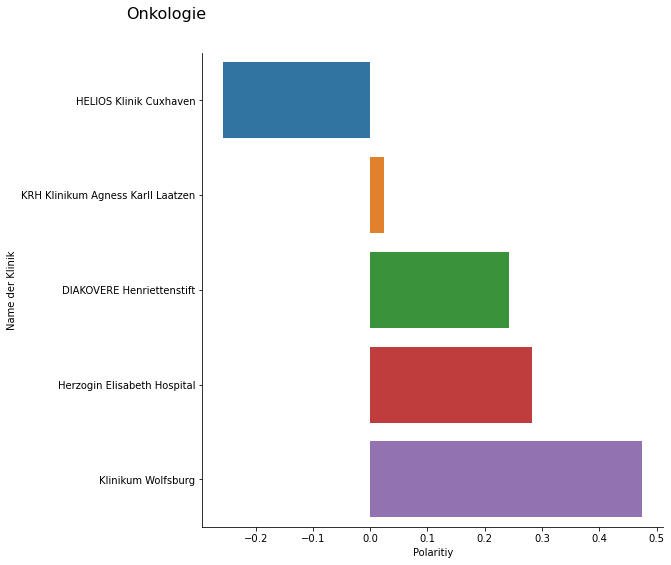

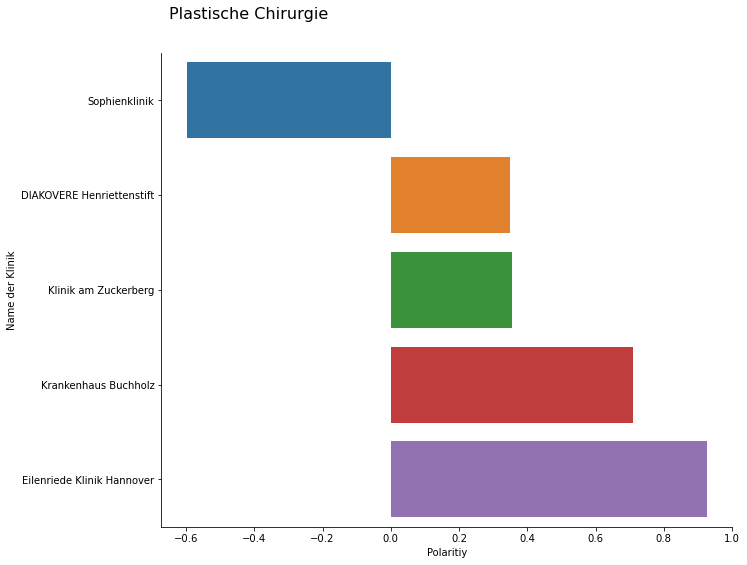

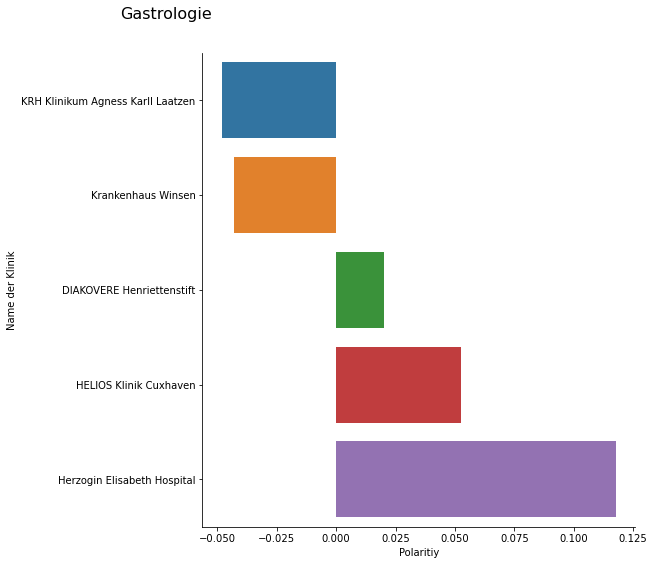

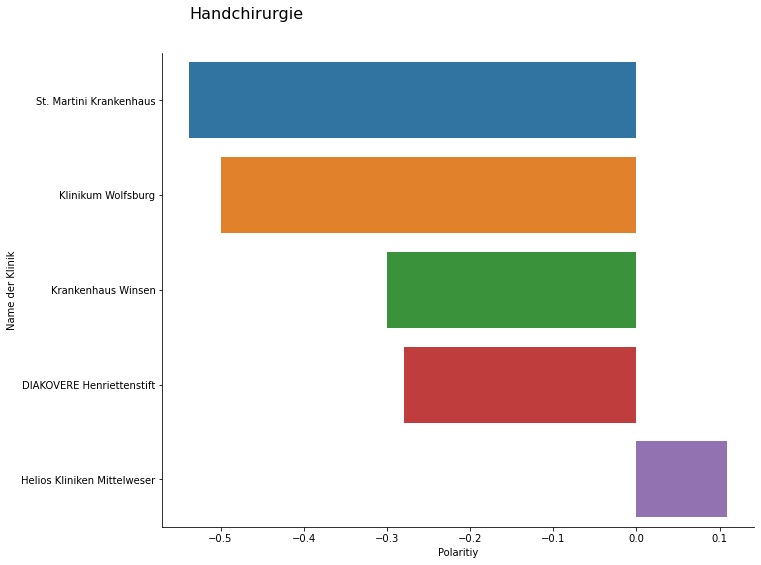

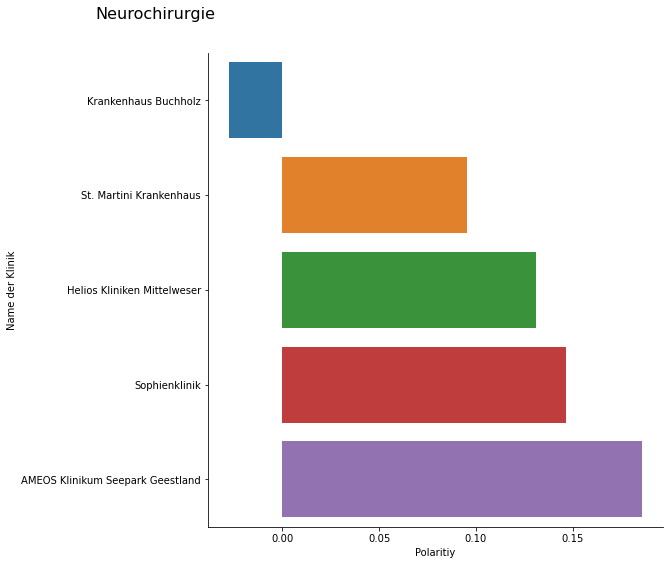

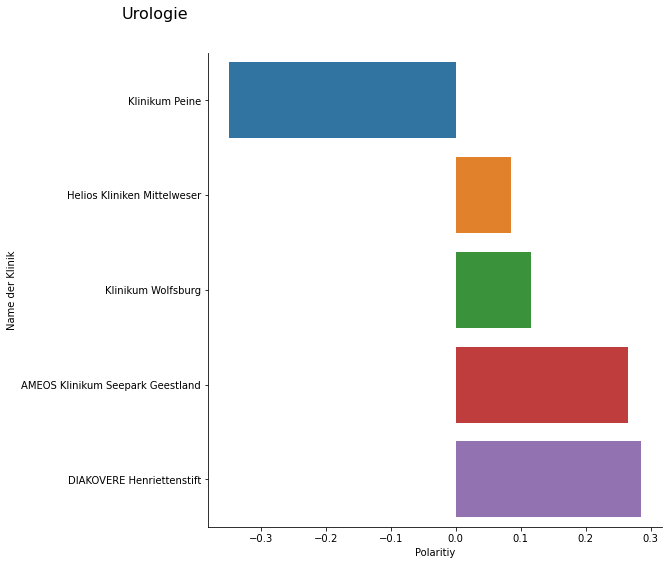

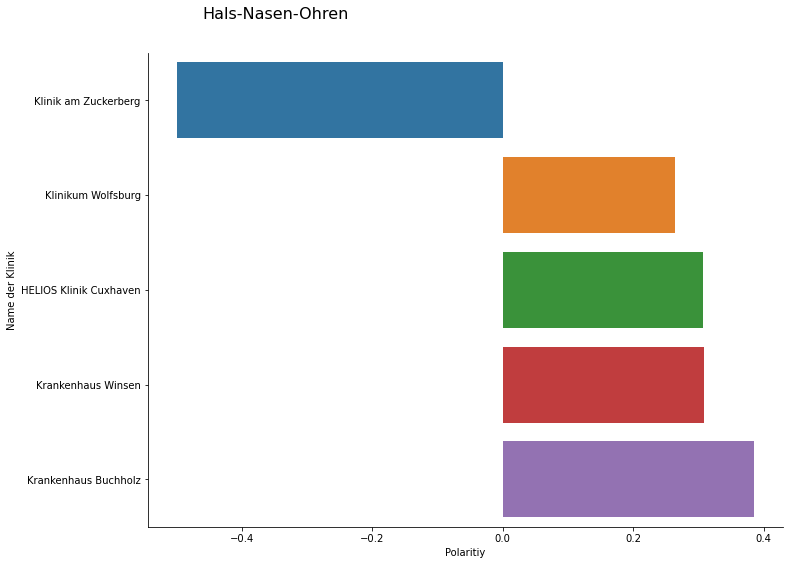

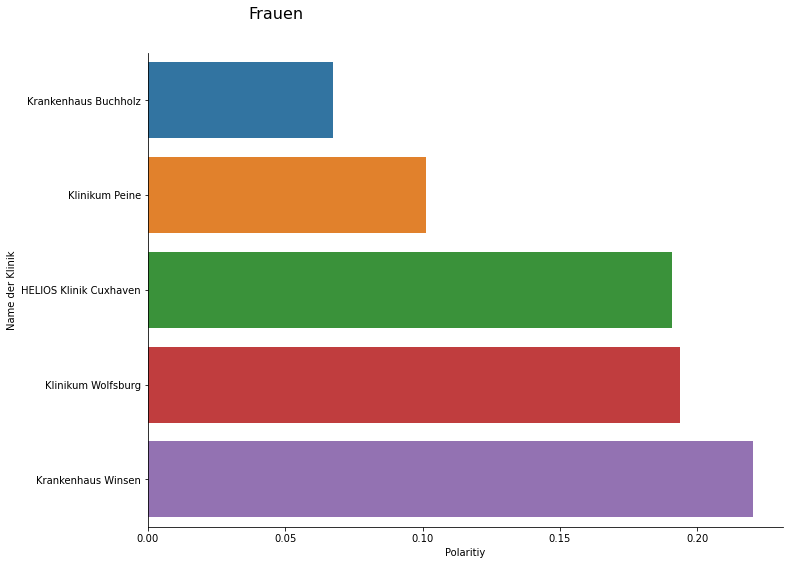

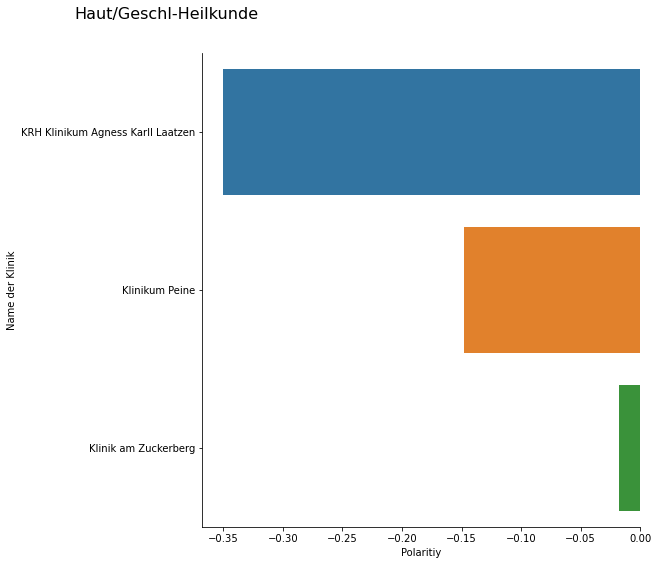

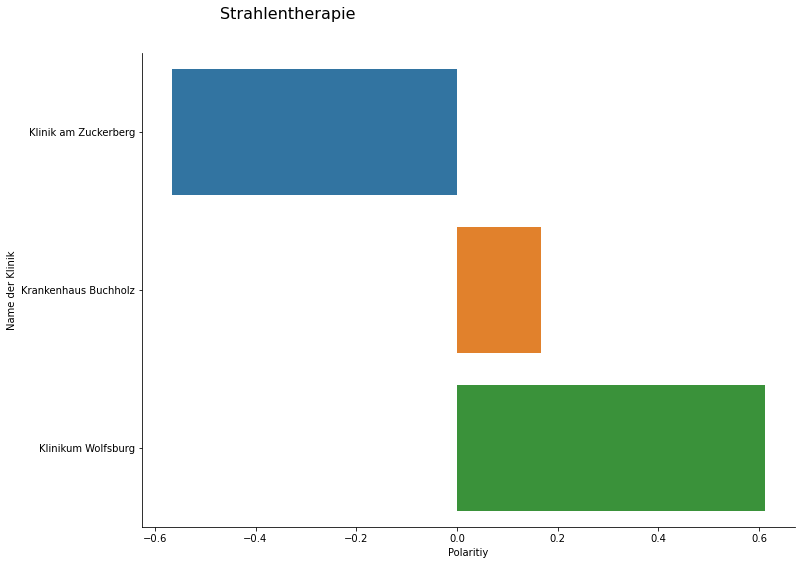

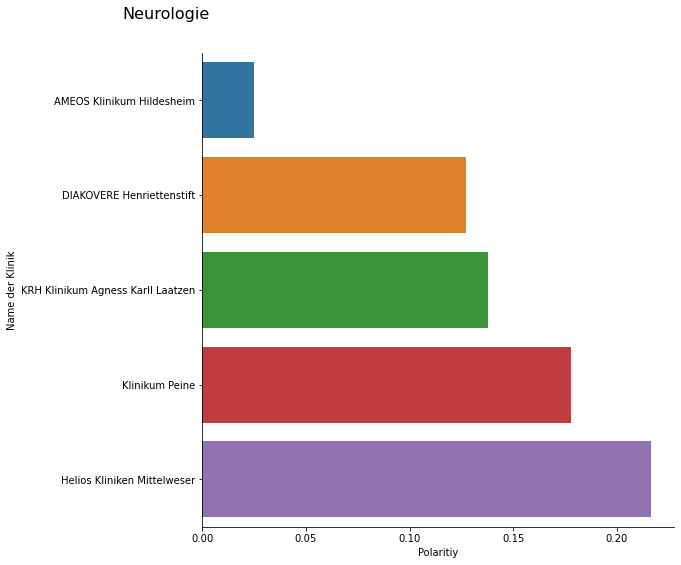

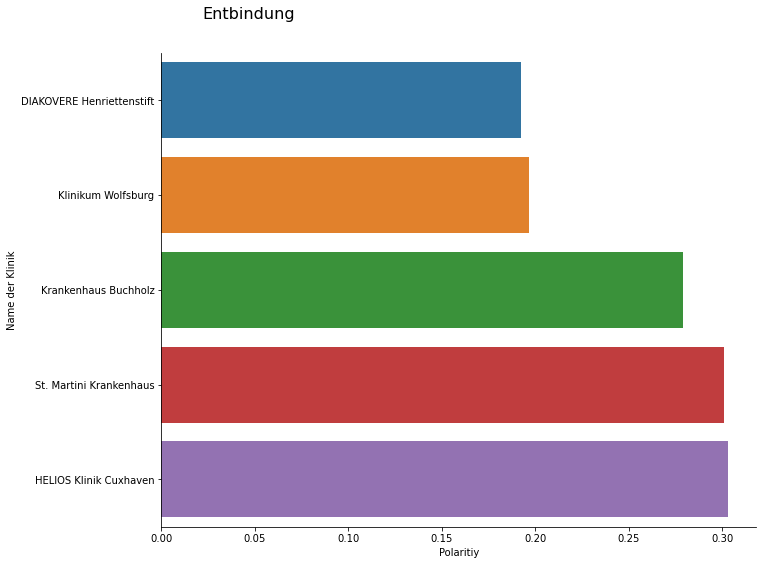

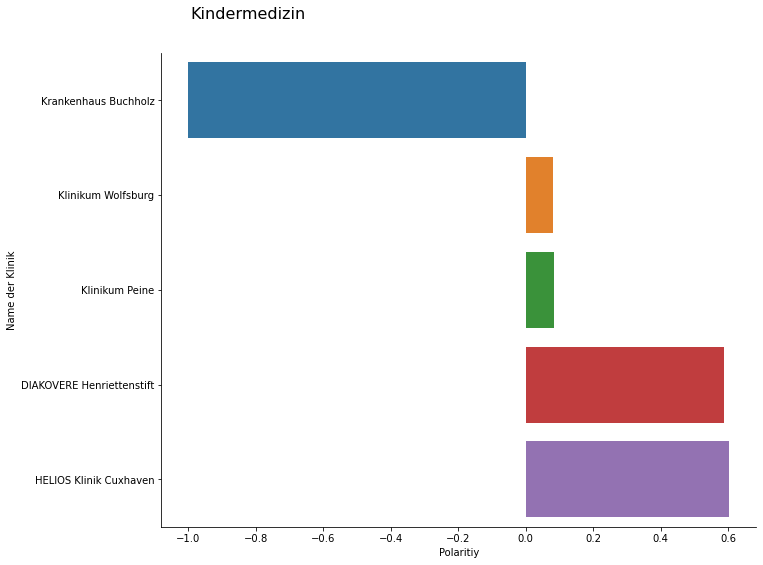

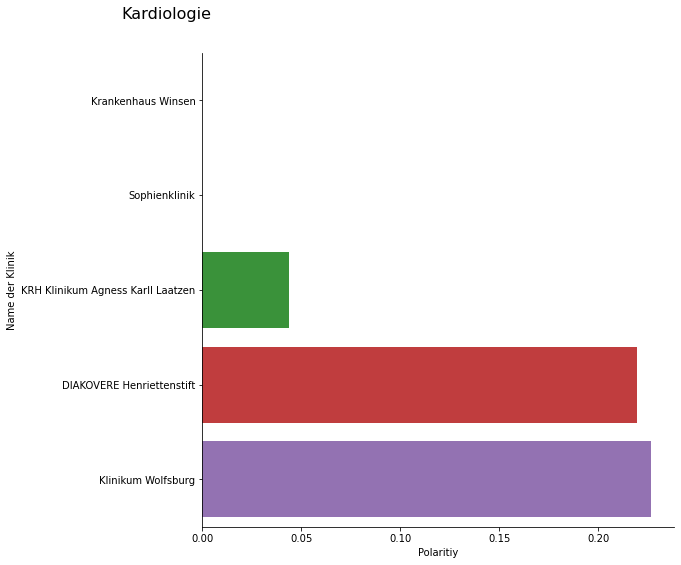

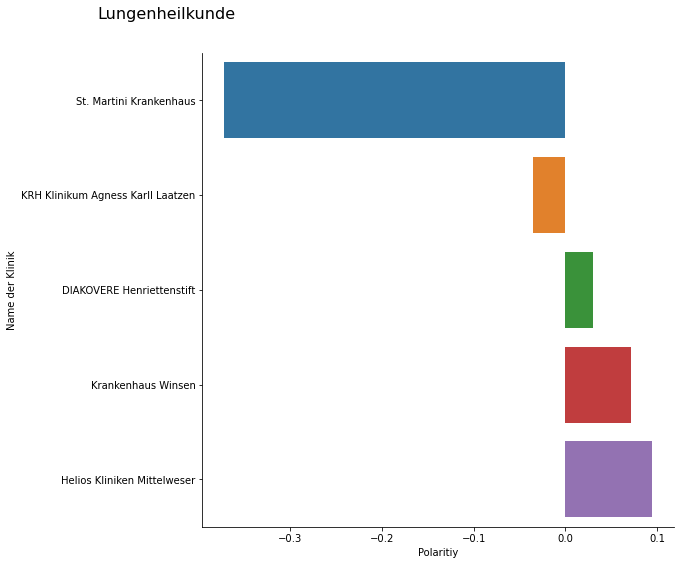

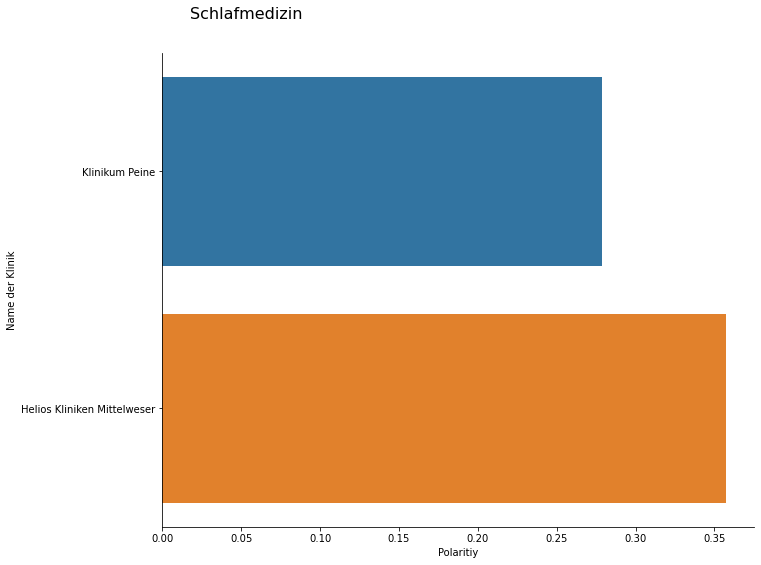

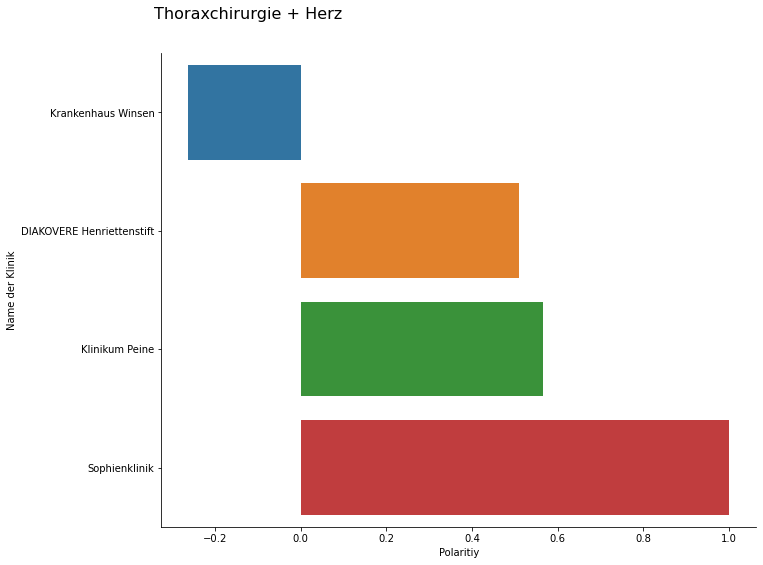

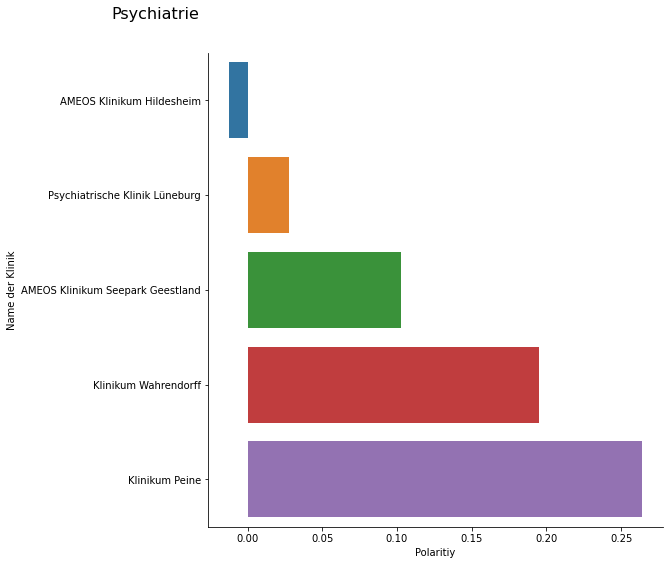

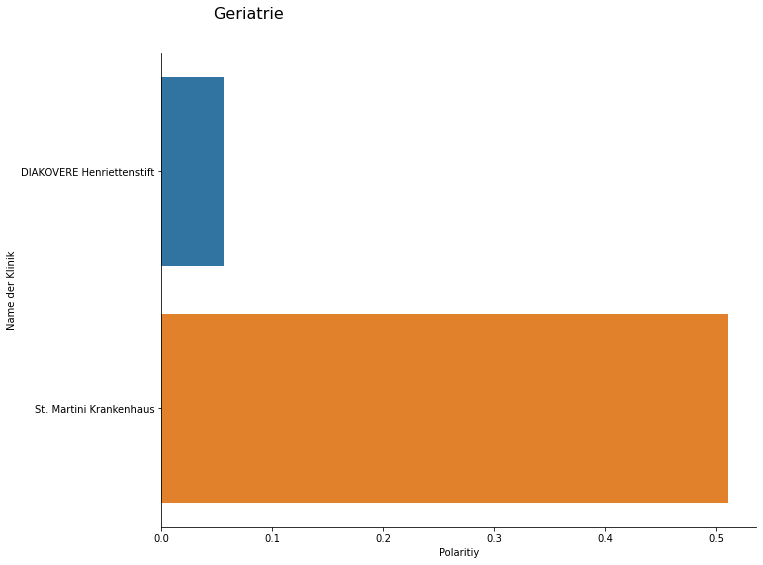

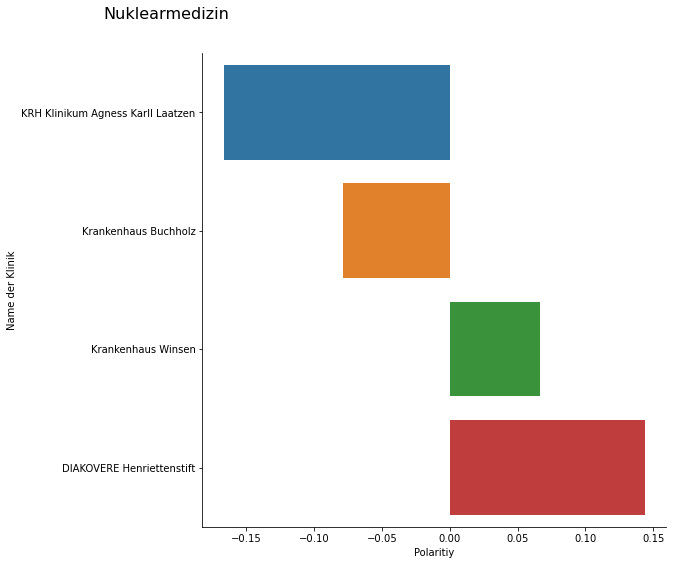

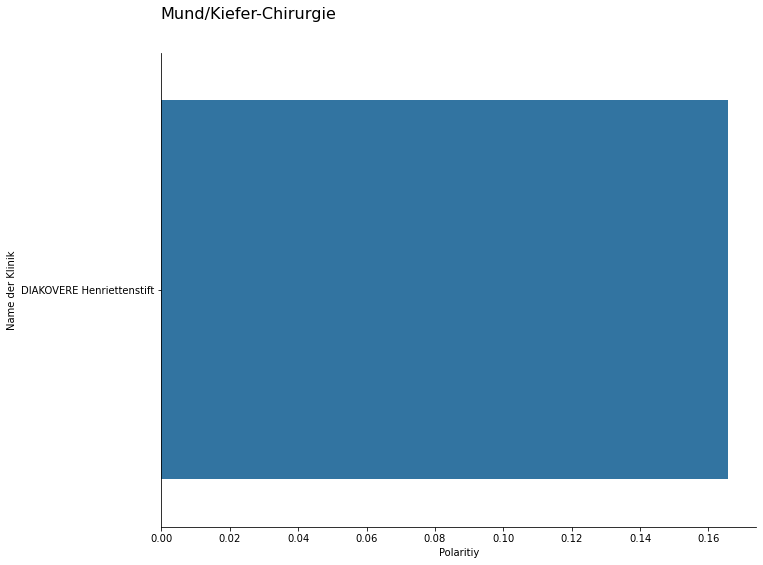

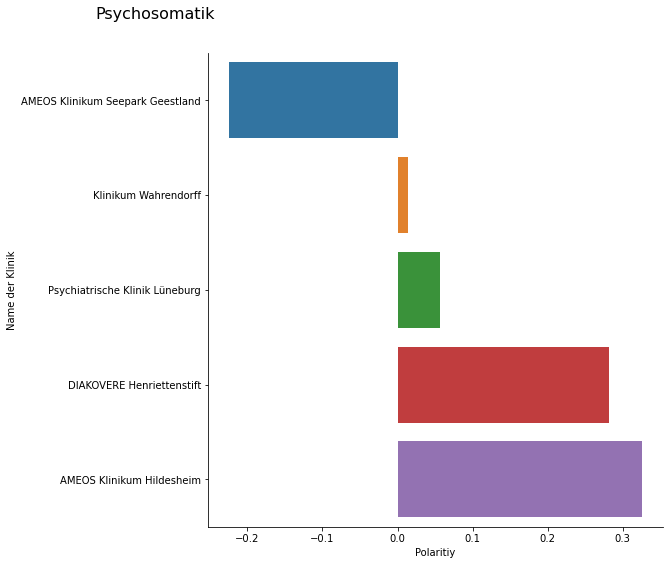

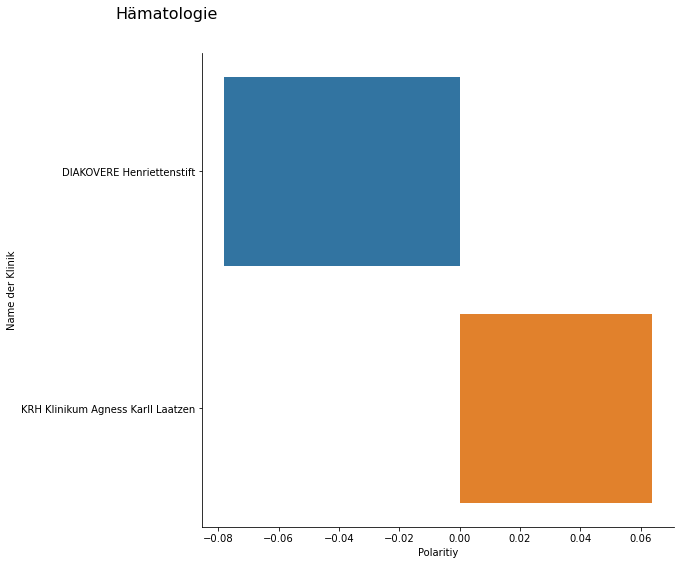

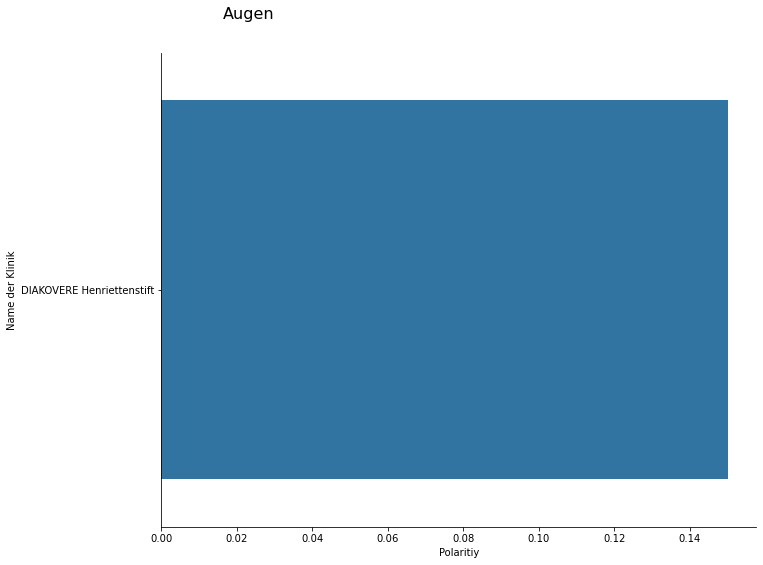

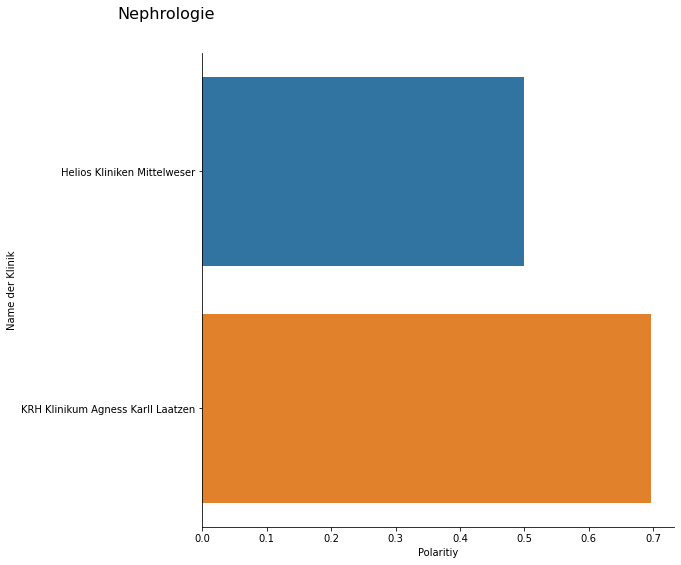

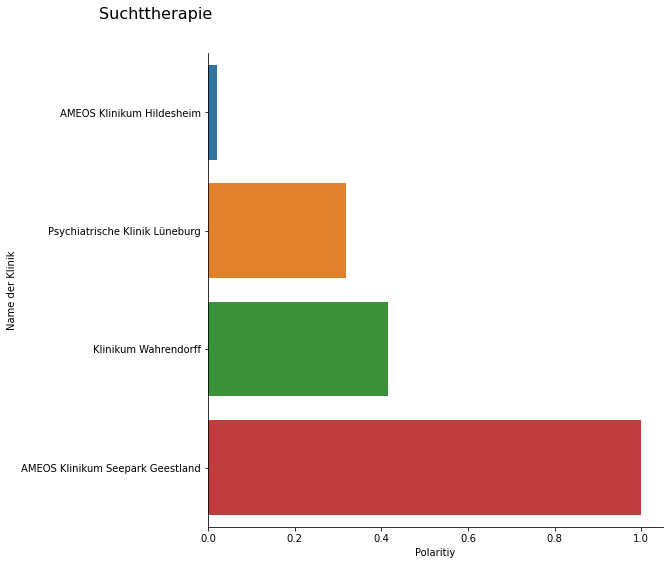

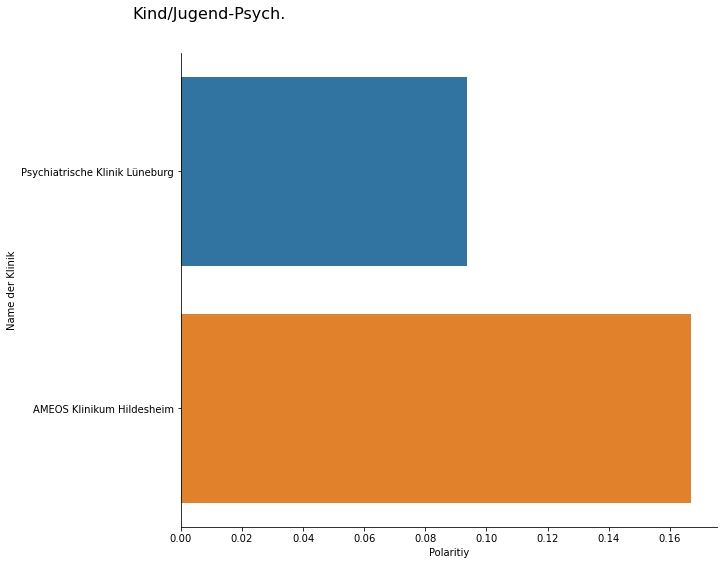

In [102]:
i=0
for fach in df["Fachbereich"].unique():
    top_kliniks=fach_pol_gr_df[fach_pol_gr_df["Fachbereich"]==fach].sort_values(by=['Polaritiy'],ascending=True).head()
    g=sns.catplot(x="Polaritiy",y="Name der Klinik",data=top_kliniks ,kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(fach, fontsize=16)
    name="Images/FachbyFach/BesteKlinikenProFach_"+str(i)+".png"
    
    i=i+1
    #g.fig.savefig(name)
    
    
    

End...

In [108]:
i=0
for fach in df["Fachbereich"].unique():
    top_kliniks=fach_pol_gr_df[fach_pol_gr_df["Fachbereich"]==fach].sort_values(by=['Polaritiy'],ascending=True)
    print(fach)
    print(top_kliniks)

Orthopädie
                       Name der Klinik Fachbereich  Polaritiy
57              HELIOS Klinik Cuxhaven  Orthopädie   0.026471
152                 Klinikum Wolfsburg  Orthopädie   0.136560
185                 Krankenhaus Winsen  Orthopädie   0.190506
31           DIAKOVERE Henriettenstift  Orthopädie   0.269944
103  KRH Klinikum Agness Karll Laatzen  Orthopädie   0.283607
199                      Sophienklinik  Orthopädie   0.284478
215            St. Martini Krankenhaus  Orthopädie   0.306746
129                     Klinikum Peine  Orthopädie   0.325833
113               Klinik am Zuckerberg  Orthopädie   0.337500
85         Herzogin Elisabeth Hospital  Orthopädie   0.342333
8     AMEOS Klinikum Seepark Geestland  Orthopädie   0.351976
42          Eilenriede Klinik Hannover  Orthopädie   0.424180
73         Helios Kliniken Mittelweser  Orthopädie   0.683333
170               Krankenhaus Buchholz  Orthopädie   0.844792
Unfallchirurgie
                       Name der Klinik     